# Problem Description

**How do you uncover the stars behind the numbers?**

In football, player ratings aren’t just numbers—they’re a way to measure skill, potential, and reputation. But what if we could predict them? What if we could uncover what makes a player truly stand out?

This project takes on the challenge of predicting FIFA 23 player ratings using real data like age, club, position, height, and even contract details. From young talents full of potential to experienced stars, every player’s numbers tell a unique story.

But it’s not easy. A striker’s value isn’t judged the same way as a defender’s. Predicting ratings means understanding how different roles, skills, and attributes shape a player’s performance.

Why does this matter? Scouts could find hidden gems. Gamers could understand what makes their favorite players great. And fans could see football in a whole new light.

Can we crack the code behind these ratings? Let’s find out.

![FIFA 23](https://raw.githubusercontent.com/Niyetali/FIFA-Rating-Prediction/main/input/fifa-23.jpg)

# Dataset Description

This dataset is focused on predicting the **Overall rating** of FIFA 23 players, which is the target variable. The remaining columns serve as features, providing real-world data to help uncover the patterns and factors that influence player ratings. Here’s a breakdown of the dataset:

---

#### **Player Information**
- **ID**: Unique identifier for each player.
- **Name**: The player’s name.
- **Age**: The player’s age.
- **Photo**: Link to the player’s image.
- **Nationality**: The country the player represents.
- **Flag**: Link to the country’s flag.
- **Height**: The player’s height.
- **Weight**: The player’s weight.
- **Body Type**: The player’s physical build.
- **Real Face**: Indicates if the player’s face is represented in the game (binary):
  Values: "Yes", "No".

---

#### **Player Ratings and Attributes**
- **Potential**: The player’s potential future rating.
- **Special**: A unique attribute reflecting specialized skills.
- **Preferred Foot**: The player’s dominant foot.
- **International Reputation**: Global popularity rating.
- **Weak Foot**: The player’s ability to use their weaker foot.
- **Skill Moves**: The player’s ability to perform skill moves.
- **Work Rate**: Effort levels in attack and defense.
- **Position**: The player’s main playing position.

---

#### **Club and Contract Information**
- **Club**: The name of the club the player represents.
- **Club Logo**: Link to the club’s logo.
- **Joined**: Date the player joined their current club.
- **Loaned From**: If applicable, the club the player is loaned from.
- **Contract Valid Until**: The year the player’s contract expires.
- **Release Clause**: The player’s release clause value.

---

#### **Financial Information**
- **Value**: The player’s market value.
- **Wage**: Weekly wage of the player.

---

#### **Miscellaneous**
- **Kit Number**: The player’s jersey number.
- **Best Overall Rating**: The highest rating achieved across all positions (mostly empty).

---

#### **Target Variable**
- **Overall**: The player’s current overall skill rating, which serves as the target variable for prediction.

# Dataset Characteristics
- **Type**: Multivariate
- **Focus**: Football Analytics
- **Task**: Regression (predicting player ratings)
- **Features**: Categorical, Numeric, Text
- **Instances**: 17,000+ players
- **Features**: 28 (plus target)

---

# Challenges
- **Complex Relationships**: Player stats, positions, and reputation interact in fascinating ways that need careful analysis.
- **Wide Variety**: Features like nationality and club include many unique categories, adding complexity.
- **Imbalanced Data**: Some attributes, like skill moves or reputation, are skewed and need fair handling.

---

# Potential Applications
- **Scouting Talent**: Spot rising stars and hidden gems based on key stats.
- **Building Teams**: Find the perfect player for any role using data insights.
- **Gaming Insights**: Understand how ratings are created to master team setups in FIFA.
- **Analysis**: Explore how real-world performance translates into player ratings.

# Dependencies loading

In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi

from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency, pearsonr
from sklearn.preprocessing import LabelEncoder

# Utilities
import os
import warnings
warnings.filterwarnings('ignore')

# Project setup

In [288]:
fifa_url = 'https://raw.githubusercontent.com/Niyetali/FIFA-Rating-Prediction/refs/heads/main/input/FIFA23_official_data.csv'

# Configuration to display all columns (the dataset has many features)
pd.set_option('display.max_columns', None)

# Data preparation

In [291]:
df = pd.read_csv(fifa_url, sep=',')
df.head(10)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,€91M,€115K,2312,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,€78.5M,€190K,2305,Right,3.0,3.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,€46.5M,€46K,2303,Left,2.0,3.0,3.0,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,€107.5M,€350K,2303,Right,4.0,5.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,€89.5M,€110K,2296,Right,3.0,3.0,3.0,High/ High,Normal (170-),Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN
5,212622,J. Kimmich,27,https://cdn.sofifa.net/players/212/622/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,89,90,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,€105.5M,€130K,2283,Right,4.0,4.0,3.0,High/ Medium,Normal (170-185),Yes,"<span class=""pos pos9"">RDM","Jul 1, 2015",NaN,2025,177cm,75kg,€182M,6.0,NaN
6,197445,D. Alaba,30,https://cdn.sofifa.net/players/197/445/23_60.png,Austria,https://cdn.sofifa.net/flags/at.png,86,86,Real Madrid CF,https://cdn.sofifa.net/teams/243/30.png,€55.5M,€220K,2277,Left,4.0,4.0,3.0,Medium/ Medium,Normal (170-185),Yes,"<span class=""pos pos6"">LCB","Jul 1, 2021",NaN,2026,180cm,78kg,€113.8M,4.0,NaN
7,187961,22 Paulinho,32,https://cdn.sofifa.net/players/187/961/22_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,83,83,Al Ahli,https://cdn.sofifa.net/teams/112387/30.png,€28.5M,€61K,2273,Right,3.0,4.0,4.0,High/ High,Normal (170-185),Yes,"<span class=""pos pos15"">LCM","Jul 22, 2021",NaN,2024,183cm,80kg,€48.5M,15.0,NaN
8,208333,E. Can,28,https://cdn.sofifa.net/players/208/333/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,82,82,Borussia Dortmund,https://cdn.sofifa.net/teams/22/30.png,€30.5M,€63K,2271,Right,3.0,4.0,3.0,Medium/ High,Stocky (185+),Yes,"<span class=""pos pos28"">SUB","Feb 18, 2020",NaN,2024,186cm,86kg,€51.9M,23.0,NaN
9,210514,João Cancelo,28,https://cdn.sofifa.net/players/210/514/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,88,88,Manchester City,https://cdn.sofifa.net/teams/10/30.png,€82.5M,€250K,2262,Right,3.0,4.0,4.0,High/ Medium,Unique,Yes,"<span class=""pos pos7"">LB","Aug 7, 2019",NaN,2027,182cm,74kg,€152.6M,7.0,NaN


In [292]:
df.shape

(17660, 29)

# Dataset adjustment

Let’s remove features that are intuitively unlikely to impact a footballer’s rating, simplifying the data.

In [295]:
# List of columns to drop
columns_to_drop = ['Photo', 'Flag', 'Club Logo', 'Real Face', 'Kit Number',
                    'ID', 'Special', 'Joined', 'Contract Valid Until']

# Drop columns
df = df.drop(columns=columns_to_drop)

df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Loaned From',
       'Height', 'Weight', 'Release Clause', 'Best Overall Rating'],
      dtype='object')

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      17660 non-null  object 
 1   Age                       17660 non-null  int64  
 2   Nationality               17660 non-null  object 
 3   Overall                   17660 non-null  int64  
 4   Potential                 17660 non-null  int64  
 5   Club                      17449 non-null  object 
 6   Value                     17660 non-null  object 
 7   Wage                      17660 non-null  object 
 8   Preferred Foot            17660 non-null  object 
 9   International Reputation  17660 non-null  float64
 10  Weak Foot                 17660 non-null  float64
 11  Skill Moves               17660 non-null  float64
 12  Work Rate                 17660 non-null  object 
 13  Body Type                 17622 non-null  object 
 14  Positi

We can see that most columns are categorical, which means we’ll need to handle a significant amount of encoding to prepare the data for analysis.

## Handling Missing Values

It goes without saying that it is crucial to deal with missing values to proceed further with dataset analysis and later, improve a model's performance. Thus, we will investigate whether to remove or fill these missing values.

In [304]:
df.isnull().sum()

Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          211
Value                           0
Wage                            0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                      38
Position                       35
Loaned From                 16966
Height                          0
Weight                          0
Release Clause               1151
Best Overall Rating         17639
dtype: int64

In [305]:
# Best Overall Rating has too many missing values so,
# it would not make sense to keep this column.
df = df.drop(columns=['Best Overall Rating'])

# The original owner of the player might make sense to keep for now.
# Lets replace NaNs with Permanent for now, meaning players that are not on loan.
df['Loaned From'] = df['Loaned From'].fillna('Permanent')
df['Loaned From'] = df['Loaned From'].astype('category')

df['Loaned From'].head

<bound method NDFrame.head of 0        Permanent
1        Permanent
2        Permanent
3        Permanent
4        Permanent
           ...    
17655    Permanent
17656    Permanent
17657    Permanent
17658    Permanent
17659    Permanent
Name: Loaned From, Length: 17660, dtype: category
Categories (271, object): ['<a href="/team/1/arsenal/">Arsenal</a>', '<a href="/team/10/manchester-city/">Mancheste..., '<a href="/team/100087/oud-heverlee-leuven/">O..., '<a href="/team/10029/tsg-hoffenheim/">TSG Hof..., ..., '<a href="/team/95/leicester-city/">Leicester ..., '<a href="/team/97/millwall/">Millwall</a>', '<a href="/team/983/suwon-samsung-bluewings/">..., 'Permanent']>

**Club**, **Body Type**, and **Position** have only a few missing values. Clubs can be filled with "Unknown," as this is unlikely to significantly impact our analysis. For Body Type, missing values could be filled based on **Height** and **Weight**—for example, shorter and heavier players might be categorized as "Stocky," while taller and lighter players could be labeled as "Lean." For **Position**, we can consider removing the rows with missing values.

**BUT,** before addressing the missing values, we also need to clean and convert the variables into their appropriate data types.

### `Club`

In [311]:
df['Club'] = df['Club'].astype('category')

# Setting "Unknown" as a new category 
df['Club'] = df['Club'].cat.add_categories('Unknown')

# Now lets fill the column
df['Club'] = df['Club'].fillna('Unknown')

df.isnull().sum()

Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                           0
Value                          0
Wage                           0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                     38
Position                      35
Loaned From                    0
Height                         0
Weight                         0
Release Clause              1151
dtype: int64

### `Weight`

In [314]:
df['Weight'].head(10)

0    82kg
1    69kg
2    69kg
3    70kg
4    68kg
5    75kg
6    78kg
7    80kg
8    86kg
9    74kg
Name: Weight, dtype: object

In [316]:
# Remove kg suffix 
df['Weight'] = df['Weight'].str.replace('kg', '').astype('int64')

df['Weight'].head(10)

0    82
1    69
2    69
3    70
4    68
5    75
6    78
7    80
8    86
9    74
Name: Weight, dtype: int64

### `Height`

In [319]:
df['Height'].head(10)

0    189cm
1    179cm
2    172cm
3    181cm
4    172cm
5    177cm
6    180cm
7    183cm
8    186cm
9    182cm
Name: Height, dtype: object

In [321]:
# Remove cm suffix 
df['Height'] = df['Height'].str.replace('cm', '').astype('int64')

df['Height'].head(10)

0    189
1    179
2    172
3    181
4    172
5    177
6    180
7    183
8    186
9    182
Name: Height, dtype: int64

### `Body Type`

In [324]:
df['Body Type'].unique()

array(['Unique', 'Stocky (170-185)', 'Normal (170-)', 'Normal (170-185)',
       'Stocky (185+)', 'Lean (185+)', 'Lean (170-185)', 'Normal (185+)',
       'Lean (170-)', 'Stocky (170-)', nan], dtype=object)

In [326]:
# Remove height suffix
df['Body Type'] = df['Body Type'].str.split('(', expand=True)[0].str.strip()
df['Body Type'] = df['Body Type'].astype('category')

df['Body Type'].unique()

['Unique', 'Stocky', 'Normal', 'Lean', NaN]
Categories (4, object): ['Lean', 'Normal', 'Stocky', 'Unique']

In [328]:
# Filling Body Type based on Height and Weight thresholds
def fill_body_type(row):    
    if pd.isnull(row['Body Type']):
        
        if row['Height'] > 185 and row['Weight'] > 80:
            return 'Stocky'
        elif row['Height'] < 175 and row['Weight'] < 70:
            return 'Lean'
        else:
            return 'Normal'
            
    return row['Body Type']

df['Body Type'] = df.apply(fill_body_type, axis=1)

df['Body Type'].unique()

array(['Unique', 'Stocky', 'Normal', 'Lean'], dtype=object)

### `Value`, `Wage` and `Release Clause`

In [331]:
print(df[["Value", "Wage", "Release Clause"]])

         Value   Wage Release Clause
0         €91M  €115K          €157M
1       €78.5M  €190K          €155M
2       €46.5M   €46K         €97.7M
3      €107.5M  €350K        €198.9M
4       €89.5M  €110K        €154.4M
...        ...    ...            ...
17655    €100K   €500          €218K
17656    €100K   €500          €188K
17657     €70K    €2K          €142K
17658     €90K   €500          €214K
17659     €90K   €500          €131K

[17660 rows x 3 columns]


Lets convert `Value`, `Release Clause` and `Wage` into a float variable.

In [334]:
def convert_currency(value):
    if isinstance(value, str):
        value = value.replace('€', '')  # first remove the euro sign
        
        if 'M' in value:  # for values in millions
            return float(value.replace('M', '')) * 1000000
        elif 'K' in value:  # for values in thousands
            return float(value.replace('K', '')) * 1000
        else:  # For values without suffix
            return float(value)
            
    return 0  # handle missing values

# applying the function to these features
df['Value'] = df['Value'].apply(convert_currency)
df['Wage'] = df['Wage'].apply(convert_currency)
df['Release Clause'] = df['Release Clause'].apply(convert_currency)

print(df[["Value", "Wage", "Release Clause"]])

             Value      Wage  Release Clause
0       91000000.0  115000.0     157000000.0
1       78500000.0  190000.0     155000000.0
2       46500000.0   46000.0      97700000.0
3      107500000.0  350000.0     198900000.0
4       89500000.0  110000.0     154400000.0
...            ...       ...             ...
17655     100000.0     500.0        218000.0
17656     100000.0     500.0        188000.0
17657      70000.0    2000.0        142000.0
17658      90000.0     500.0        214000.0
17659      90000.0     500.0        131000.0

[17660 rows x 3 columns]


### `Release Clause`

The **Release Clause** column still has a few missing values. To handle this, we can fill the missing entries with the median of the column. This ensures the missing values are replaced with a representative number without skewing the data. Currently, there are 1,151 missing values in this column.

In [338]:
release_clause_median = df['Release Clause'].median()

df['Release Clause'] = df['Release Clause'].fillna(release_clause_median)

### `Position`

In [341]:
df['Position'].head(10)

0    <span class="pos pos28">SUB
1    <span class="pos pos15">LCM
2      <span class="pos pos7">LB
3    <span class="pos pos13">RCM
4    <span class="pos pos13">RCM
5     <span class="pos pos9">RDM
6     <span class="pos pos6">LCB
7    <span class="pos pos15">LCM
8    <span class="pos pos28">SUB
9      <span class="pos pos7">LB
Name: Position, dtype: object

Next, let’s convert remaining relevant columns into categorical data types, starting with **Position**. Upon inspection, we can see that the **Position** column contains HTML code blended into the data. We’ll clean this column to remove any unwanted HTML code before proceeding.

In [344]:
df['Position'] = df['Position'].apply(lambda x: x.split(">")[1] if isinstance(x, str) and ">" in x else x)

# Conversion
df['Position'] = df['Position'].astype('category')

# Verification 
df['Position'].unique()

['SUB', 'LCM', 'LB', 'RCM', 'RDM', ..., 'CB', NaN, 'RAM', 'LAM', 'GK']
Length: 30
Categories (29, object): ['CAM', 'CB', 'CDM', 'CF', ..., 'RW', 'RWB', 'ST', 'SUB']

`Position` has only a few missing values so we can simply drop those instances.

In [347]:
df = df.dropna(subset=['Position'])

df.isnull().sum()

Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Loaned From                 0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

### `Preferred foot`

In [350]:
df["Preferred Foot"].head(10)

0    Right
1    Right
2     Left
3    Right
4    Right
5    Right
6     Left
7    Right
8    Right
9    Right
Name: Preferred Foot, dtype: object

#### Lets convert this feature into a binary variable:

In [353]:
# Map "Right" to 1 and "Left" to 0
df['Preferred Foot'] = df['Preferred Foot'].map({'Right': 1, 'Left': 0})

df['Preferred Foot'].unique()

array([1, 0])

### `Work Rate` & `Body Type`

In [356]:
df['Work Rate'] = df['Work Rate'].astype('category')
df['Body Type'] = df['Body Type'].astype('category')

We converted objects to categories to save memory and speed up operations, especially when working with repeated or predefined values, making data handling faster and more efficient.

## Reviewing the Data

##### A final look at the dataset ensures it's clean and ready for splitting and further analysis.

In [361]:
df.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Loaned From,Height,Weight,Release Clause
0,L. Goretzka,27,Germany,87,88,FC Bayern München,91000000.0,115000.0,1,4.0,4.0,3.0,High/ Medium,Unique,SUB,Permanent,189,82,157000000.0
1,Bruno Fernandes,27,Portugal,86,87,Manchester United,78500000.0,190000.0,1,3.0,3.0,4.0,High/ High,Unique,LCM,Permanent,179,69,155000000.0
2,M. Acuña,30,Argentina,85,85,Sevilla FC,46500000.0,46000.0,0,2.0,3.0,3.0,High/ High,Stocky,LB,Permanent,172,69,97700000.0
3,K. De Bruyne,31,Belgium,91,91,Manchester City,107500000.0,350000.0,1,4.0,5.0,4.0,High/ High,Unique,RCM,Permanent,181,70,198900000.0
4,N. Barella,25,Italy,86,89,Inter,89500000.0,110000.0,1,3.0,3.0,3.0,High/ High,Normal,RCM,Permanent,172,68,154400000.0
5,J. Kimmich,27,Germany,89,90,FC Bayern München,105500000.0,130000.0,1,4.0,4.0,3.0,High/ Medium,Normal,RDM,Permanent,177,75,182000000.0
6,D. Alaba,30,Austria,86,86,Real Madrid CF,55500000.0,220000.0,0,4.0,4.0,3.0,Medium/ Medium,Normal,LCB,Permanent,180,78,113800000.0
7,22 Paulinho,32,Brazil,83,83,Al Ahli,28500000.0,61000.0,1,3.0,4.0,4.0,High/ High,Normal,LCM,Permanent,183,80,48500000.0
8,E. Can,28,Germany,82,82,Borussia Dortmund,30500000.0,63000.0,1,3.0,4.0,3.0,Medium/ High,Stocky,SUB,Permanent,186,86,51900000.0
9,João Cancelo,28,Portugal,88,88,Manchester City,82500000.0,250000.0,1,3.0,4.0,4.0,High/ Medium,Unique,LB,Permanent,182,74,152600000.0


In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17625 entries, 0 to 17659
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Name                      17625 non-null  object  
 1   Age                       17625 non-null  int64   
 2   Nationality               17625 non-null  object  
 3   Overall                   17625 non-null  int64   
 4   Potential                 17625 non-null  int64   
 5   Club                      17625 non-null  category
 6   Value                     17625 non-null  float64 
 7   Wage                      17625 non-null  float64 
 8   Preferred Foot            17625 non-null  int64   
 9   International Reputation  17625 non-null  float64 
 10  Weak Foot                 17625 non-null  float64 
 11  Skill Moves               17625 non-null  float64 
 12  Work Rate                 17625 non-null  category
 13  Body Type                 17625 non-null  category


In [365]:
df.isnull().sum()

Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Loaned From                 0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

In [367]:
df.shape

(17625, 19)

# Dataset Splitting

We split the dataset into:

- **Training (& Validation) dataset**: 80% of the data.
- **Test dataset**: 20% of the data for final evaluation.

Test dataset will be used only for the final predictions! We assume that during the entire study Training does not have access to it and do not study its statistical properties.

In [371]:
# Define features (X) and target (y)
X = df.drop('Overall', axis = 1)
y = df['Overall']

# Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [373]:
print(X_train.shape, X_test.shape)

(14100, 18) (3525, 18)


In [375]:
print(y_train.shape, y_test.shape)

(14100,) (3525,)


# EDA (Exploratory Data Analysis)

## Descriptive analyses of the data

In [379]:
X_train.head(10)

,Name,Age,Nationality,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Loaned From,Height,Weight,Release Clause
6023,H. Stenevik,22,Norway,74,Strømsgodset IF,1100000.0,1000.0,1,1.0,3.0,4.0,Medium/ High,Lean,RW,Permanent,185,70,1600000.0
17163,22 T. Wooster,16,England,73,Manchester United,230000.0,500.0,1,1.0,3.0,1.0,Medium/ Medium,Lean,RES,Permanent,195,85,656000.0
1750,14 J. Rothen,35,France,71,Stade Malherbe Caen,325000.0,15000.0,0,2.0,2.0,3.0,Medium/ Medium,Normal,SUB,Permanent,177,74,0.0
2661,22 D. Noboa,26,Ecuador,70,Guayaquil City FC,1100000.0,500.0,1,1.0,3.0,2.0,Medium/ High,Normal,LDM,Permanent,183,79,2400000.0
13361,22 Baek Seung Woo,22,Korea Republic,62,Jeju United FC,180000.0,1000.0,1,1.0,3.0,2.0,Medium/ Medium,Normal,SUB,Permanent,170,65,261000.0
2158,22 Pipa,23,Spain,78,Huddersfield Town,3600000.0,6000.0,1,1.0,4.0,3.0,Medium/ Medium,Normal,SUB,Permanent,176,72,7600000.0
15054,22 Park Seong Hun,18,Korea Republic,66,FC Seoul,110000.0,500.0,1,1.0,4.0,2.0,Medium/ High,Normal,RES,Permanent,183,72,206000.0
11363,E. Hellman,21,Sweden,71,Helsingborgs IF,525000.0,500.0,0,1.0,3.0,2.0,Medium/ Medium,Normal,RB,Permanent,183,79,761000.0
11033,C. Kaymaz,24,Germany,63,SpVgg Bayreuth,275000.0,500.0,1,1.0,4.0,2.0,Medium/ Medium,Normal,RES,Permanent,187,80,454000.0
6113,Joan González,20,Spain,70,Lecce,500000.0,2000.0,1,1.0,3.0,3.0,High/ High,Normal,RES,Permanent,190,82,1000000.0


In [381]:
y_train.head(10)

6023     63
17163    53
1750     71
2661     66
13361    52
2158     71
15054    50
11363    59
11033    56
6113     59
Name: Overall, dtype: int64

In [383]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14100 entries, 6023 to 15826
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Name                      14100 non-null  object  
 1   Age                       14100 non-null  int64   
 2   Nationality               14100 non-null  object  
 3   Potential                 14100 non-null  int64   
 4   Club                      14100 non-null  category
 5   Value                     14100 non-null  float64 
 6   Wage                      14100 non-null  float64 
 7   Preferred Foot            14100 non-null  int64   
 8   International Reputation  14100 non-null  float64 
 9   Weak Foot                 14100 non-null  float64 
 10  Skill Moves               14100 non-null  float64 
 11  Work Rate                 14100 non-null  category
 12  Body Type                 14100 non-null  category
 13  Position                  14100 non-null  catego

In [385]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 14100 entries, 6023 to 15826
Series name: Overall
Non-Null Count  Dtype
--------------  -----
14100 non-null  int64
dtypes: int64(1)
memory usage: 220.3 KB


## Target variable analysis

### Unique Values

In [389]:
y_train.unique()

array([63, 53, 71, 66, 52, 50, 59, 56, 62, 60, 72, 77, 57, 80, 67, 74, 54,
       58, 61, 65, 78, 55, 73, 64, 70, 68, 79, 48, 75, 91, 46, 76, 69, 51,
       49, 82, 81, 84, 83, 86, 85, 87, 47, 89, 88, 45, 90, 44])

### Value Counts

In [392]:
y_train.value_counts()

Overall
60    780
63    742
62    741
64    735
61    712
65    613
59    608
58    584
57    523
67    520
66    510
68    480
56    473
55    469
69    421
53    420
70    411
54    411
72    367
52    344
71    338
75    335
73    312
50    275
74    272
51    268
76    241
77    167
78    156
79    147
49    129
80    111
48     94
81     92
82     65
84     55
47     46
83     34
85     23
86     20
46     16
87     11
88     11
89      6
91      4
90      4
45      2
44      2
Name: count, dtype: int64

### Basic Statistics

In [395]:
print(f"Mean: {y_train.mean()}")
print(f"Median: {y_train.median()}")
print(f"Mode: {y_train.mode()}")
print(f"Standard Deviation: {y_train.std()}")
print(f"Variance: {y_train.var()}")

Mean: 63.37872340425532
Median: 63.0
Mode: 0    60
Name: Overall, dtype: int64
Standard Deviation: 8.04561617544748
Variance: 64.73193964262214


### Top 10 Players by Overall Rating

In [398]:
X_train_overall = X_train.copy()
X_train_overall['Overall'] = y_train

# Sort by Overall and select the top 10
xtrain_overall = X_train_overall.sort_values(['Overall'], ascending=False).head(10)

xtrain_overall[['Name', 'Overall', 'Potential', 'Club', 'Nationality', 'Age', 'Position']].style.background_gradient(cmap='Greens')

,Name,Overall,Potential,Club,Nationality,Age,Position
41,R. Lewandowski,91,91,FC Barcelona,Poland,33,ST
75,K. Mbappé,91,95,Paris Saint-Germain,France,23,ST
124,K. Benzema,91,91,Real Madrid CF,France,34,CF
56,L. Messi,91,91,Paris Saint-Germain,Argentina,35,RW
9151,M. Neuer,90,90,FC Bayern München,Germany,36,GK
25,M. Salah,90,90,Liverpool,Egypt,30,RW
192,V. van Dijk,90,90,Liverpool,Netherlands,30,LCB
100,Cristiano Ronaldo,90,90,Manchester United,Portugal,37,ST
108,N. Kanté,89,89,Chelsea,France,31,RCM
52,H. Kane,89,89,Tottenham Hotspur,England,28,ST


**These are the Top 10 Players by Overall Rating** ->  R. Lewandowski, K. Mbappé, K. Benzema, L. Messi, M. Neuer,  
M. Salah, V. van Dijk, Cristiano Ronaldo, N. Kanté, H. Kane.

---

#### Interesting Facts:

- **3 French players** (K. Mbappé, K. Benzema, N.Kanté) make it to the top 10 list!  
- **Paris Saint-Germain shines** with **2 stars** (K. Mbappé & L. Messi) making the cut.  
- **No surprise! Top players come from elite clubs** like Bayern München, PSG, Real Madrid, and Liverpool.  
- **Liverpool proves its strength** with 2 of their best (M. Salah & V. van Dijk) featured in the list.  
- **Top positions dominate:** Most players in the top 10 are **forwards**, reflecting their influence on the game.  

### Bottom 10 Players by Overall Rating

In [402]:
X_train_overall = X_train.copy()
X_train_overall['Overall'] = y_train

# Sort by Overall and select the top 10
xtrain_overall = X_train_overall.sort_values(['Overall'], ascending=True).head(10)

xtrain_overall[['Name', 'Overall', 'Potential', 'Club', 'Nationality', 'Age', 'Position']].style.background_gradient(cmap='Reds')

,Name,Overall,Potential,Club,Nationality,Age,Position
16042,20 Kim Yeong Geun,44,49,Gyeongnam FC,Korea Republic,22,RES
14634,22 Zhang Wenxuan,44,59,Guangzhou FC,China PR,16,RES
15513,22 Jung Ho Yeon,45,53,GwangJu FC,Korea Republic,20,RES
14353,22 Chen Zeshi,45,55,Shandong Taishan,China PR,16,RES
14966,A. Khan,46,58,Mumbai City FC,India,21,RES
16054,Wu Junjie,46,58,Guangzhou City,China PR,19,RES
15061,N. Logue,46,54,Finn Harps,Republic of Ireland,22,RES
17484,D. Dabas,46,55,Chennaiyin FC,India,20,RES
15913,22 L. Hebbelmann,46,50,SV Meppen,Germany,22,RES
15505,B. Singh,46,54,Jamshedpur FC,India,22,SUB


As expected, the list is dominated by **reserves and substitutes** playing in **less competitive leagues**.

### Distribution of Players Ratings

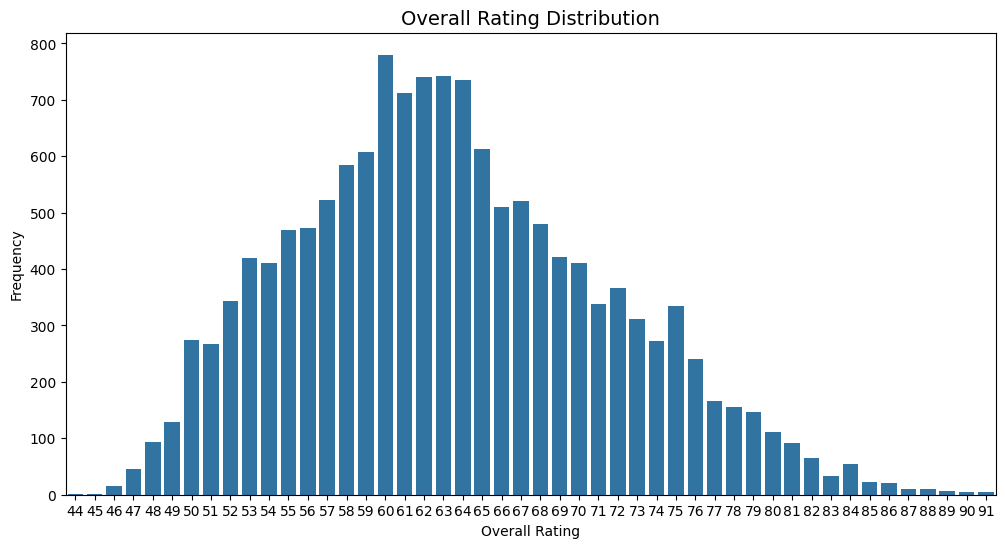

In [406]:
# Bar plot for Overall distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=y_train.value_counts().index, y=y_train.value_counts().values)

plt.title('Overall Rating Distribution', fontsize=14)
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

## Features variables analysis

### `Potential`

In [410]:
X_train['Potential'].mean()

70.96836879432624

### TOP 10 Players by Highest Potential

In [413]:
X_train_potential = X_train.copy()
X_train_potential['Overall'] = y_train

# Sort by Potential and select the top 10
xtrain_potential = X_train_potential.sort_values(['Potential'], ascending=False).head(10)

# Select relevant columns and apply a gradient style
xtrain_potential[['Name', 'Overall', 'Potential', 'Club', 'Nationality', 'Age', 'Position']].style.background_gradient(cmap='Greens')

,Name,Overall,Potential,Club,Nationality,Age,Position
75,K. Mbappé,91,95,Paris Saint-Germain,France,23,ST
180,E. Haaland,88,94,Manchester City,Norway,21,ST
214,Pedri,85,93,FC Barcelona,Spain,19,LCM
317,P. Foden,85,92,Manchester City,England,22,RW
17,F. de Jong,87,92,FC Barcelona,Netherlands,25,RCM
849,Vinícius Jr.,86,92,Real Madrid CF,Brazil,21,LW
13506,G. Donnarumma,88,92,Paris Saint-Germain,Italy,23,GK
124,K. Benzema,91,91,Real Madrid CF,France,34,CF
7843,Ederson,89,91,Manchester City,Brazil,28,GK
41,R. Lewandowski,91,91,FC Barcelona,Poland,33,ST


**These are the Top 10 Players by Potential Rating** -> K. Mbappé, E. Haaland, Pedri, P. Foden, F. de Jong,  
Vinícius Jr., G. Donnarumma, K. Benzema, Ederson, R. Lewandowski.

---

#### Interesting Facts:

- **2 French players** (K. Mbappé and K. Benzema) feature in the top 10, showcasing France’s depth in talent.  
- **PSG dominates** with **2 stars** (K. Mbappé & G. Donnarumma), proving their strong investments in future talent.
- **Real Madrid CF** also makes a strong showing with 2 players (Vinícius Jr. and K. Benzema), continuing their legacy of nurturing top talent.    
- **FC Barcelona’s** famed **La Masia** academy continues to nurture top talent like Pedri and F. de Jong, while **Pep Guardiola’s Manchester City** exemplifies how youth development translates into success at the highest level.  
- **Younger players take the spotlight**—unlike the top Overall ratings, most players here are under 25, signaling the next generation of stars.  
- **Strikers and attacking players** (K. Mbappé, E. Haaland) lead the list, but we also see midfielders (Pedri, F. de Jong) and goalkeepers (G. Donnarumma, Ederson), adding diversity to the mix.

### Bottom 10 Players by Highest Potential

In [417]:
X_train_potential = X_train.copy()
X_train_potential['Overall'] = y_train

# Sort by Potential and select the top 10
xtrain_potential = X_train_potential.sort_values(['Potential'], ascending=True).head(10)

# Select relevant columns and apply a gradient style
xtrain_potential[['Name', 'Overall', 'Potential', 'Club', 'Nationality', 'Age', 'Position']].style.background_gradient(cmap='Reds')

,Name,Overall,Potential,Club,Nationality,Age,Position
12862,Ning Hao,48,48,Dalian Professional Football Club,China PR,37,RES
14605,22 Wang Jianwen,48,48,Qingdao FC,China PR,33,SUB
12733,21 A. Harkin,49,49,Derry City,Republic of Ireland,27,RES
16042,20 Kim Yeong Geun,44,49,Gyeongnam FC,Korea Republic,22,RES
12337,S. Abdusalam,49,49,Shijiazhuang Ever Bright F.C.,China PR,28,RES
14347,Wang Hanlin,50,50,Chengdu Rongcheng F.C.,China PR,32,RES
15913,22 L. Hebbelmann,46,50,SV Meppen,Germany,22,RES
14433,22 Jin Xing,47,50,Hebei FC,China PR,24,RES
15182,N. Rabha,47,50,NorthEast United FC,India,25,SUB
14673,22 Lalkhawpuimawia,50,50,NorthEast United FC,India,29,SUB


As expected, the list is dominated by **reserves and substitutes** playing in **less competitive leagues**.

### Distribution of Players Potential

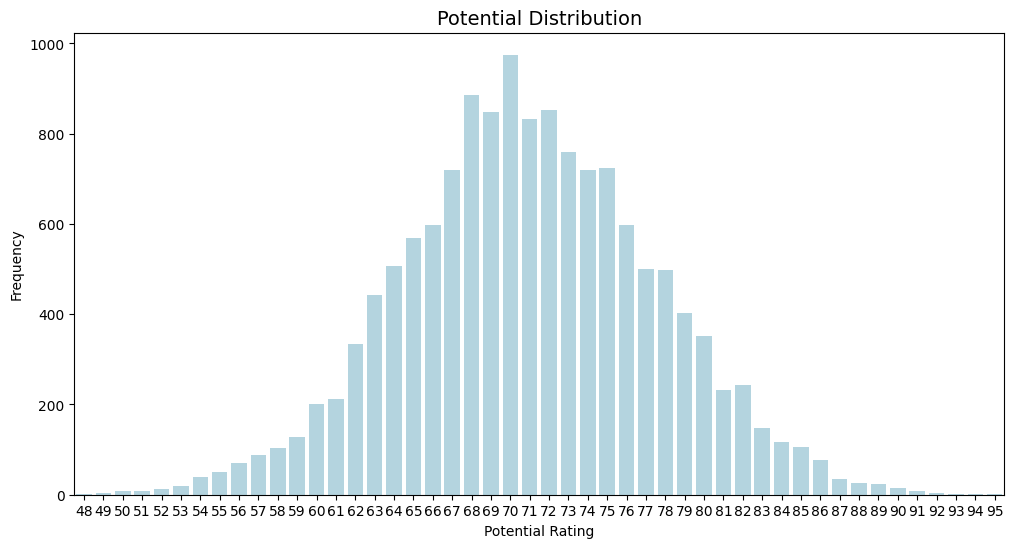

In [421]:
# Bar plot for Potential distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=X_train['Potential'].value_counts().index, y=X_train['Potential'].value_counts().values, color='lightblue')

plt.title('Potential Distribution', fontsize=14)
plt.xlabel('Potential Rating')
plt.ylabel('Frequency')
plt.show()

### `Value`

In [424]:
X_train.sort_values(['Value'],ascending=False)[:10]

,Name,Age,Nationality,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Loaned From,Height,Weight,Release Clause
75,K. Mbappé,23,France,95,Paris Saint-Germain,190500000.0,230000.0,1,4.0,4.0,5.0,High/ Low,Unique,ST,Permanent,182,73,366700000.0
180,E. Haaland,21,Norway,94,Manchester City,148000000.0,220000.0,0,4.0,3.0,3.0,High/ Medium,Unique,ST,Permanent,195,94,303400000.0
17,F. de Jong,25,Netherlands,92,FC Barcelona,116500000.0,230000.0,1,3.0,3.0,4.0,High/ Medium,Unique,RCM,Permanent,180,74,247600000.0
214,Pedri,19,Spain,93,FC Barcelona,116000000.0,115000.0,1,2.0,4.0,4.0,High/ High,Lean,LCM,Permanent,174,61,261000000.0
25,M. Salah,30,Egypt,90,Liverpool,115500000.0,270000.0,0,4.0,3.0,4.0,High/ Medium,Unique,RW,Permanent,175,71,213700000.0
317,P. Foden,22,England,92,Manchester City,109500000.0,180000.0,0,3.0,3.0,4.0,High/ High,Lean,RW,Permanent,171,69,224500000.0
849,Vinícius Jr.,21,Brazil,92,Real Madrid CF,109000000.0,200000.0,1,2.0,4.0,5.0,High/ Medium,Lean,LW,Permanent,176,73,245300000.0
1767,Rúben Dias,25,Portugal,91,Manchester City,107500000.0,230000.0,1,3.0,4.0,2.0,Medium/ High,Normal,RCB,Permanent,187,82,206900000.0
52,H. Kane,28,England,89,Tottenham Hotspur,105500000.0,240000.0,1,4.0,5.0,3.0,High/ High,Unique,ST,Permanent,188,89,200500000.0
13506,G. Donnarumma,23,Italy,92,Paris Saint-Germain,103500000.0,110000.0,1,3.0,3.0,1.0,Medium/ Medium,Unique,GK,Permanent,196,90,199200000.0


Just by looking at it, there seems to be some correlation between a player's potential and their market value, suggesting that higher potential often translates to a greater valuation in transfermarket.

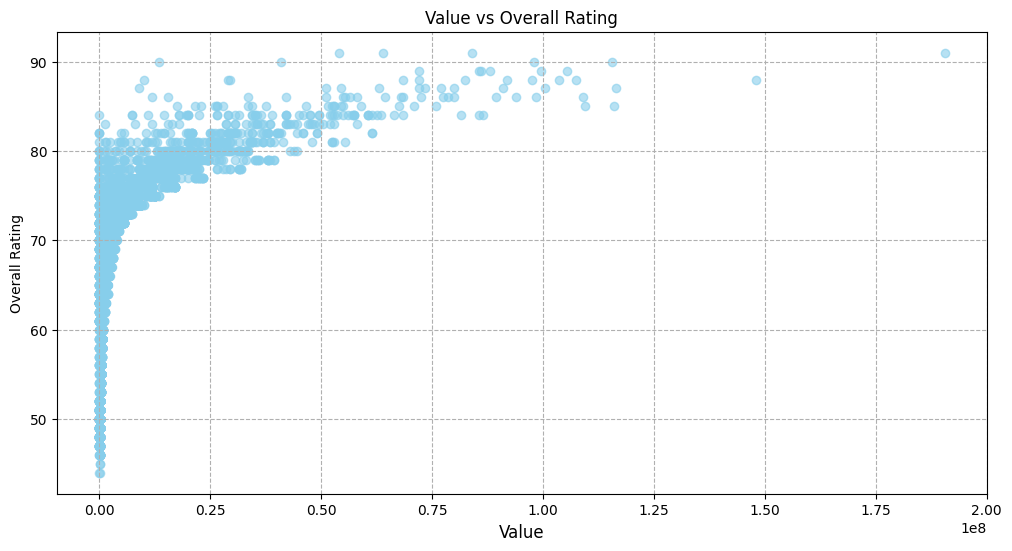

In [427]:
# Scatter plot for Value vs Overall (target)
plt.figure(figsize=(12, 6))
plt.scatter(X_train['Value'], y_train, alpha=0.6, color='#87CEEB')

plt.title('Value vs Overall Rating', fontsize=12)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Overall Rating', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=1)
plt.show()

Top players are worth so much more than the average player—it’s a huge gap in value!

### `Weak Foot`, `Skill Moves` and `International Reputation`

In [431]:
# To find the range of values for Weak Foot, Skill Moves, and International Reputation
attributes = ['Weak Foot', 'Skill Moves', 'International Reputation']

for attr in attributes:
    print(f"{attr} - Min: {X_train[attr].min()}, Max: {X_train[attr].max()}")

Weak Foot - Min: 1.0, Max: 5.0
Skill Moves - Min: 1.0, Max: 5.0
International Reputation - Min: 1.0, Max: 5.0


In [433]:
# Filter players with 5 stars for Weak Foot and Skill Moves
X_train.loc[
    (X_train['Weak Foot'] == X_train['Weak Foot'].max()) & 
    (X_train['Skill Moves'] == X_train['Skill Moves'].max())]

,Name,Age,Nationality,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Loaned From,Height,Weight,Release Clause
4872,R. Cherki,18,France,88,Olympique Lyonnais,7000000.0,19000.0,0,1.0,5.0,5.0,High/ Low,Stocky,SUB,Permanent,176,71,17700000.0
1562,Cesinha,32,Brazil,75,Daegu FC,4500000.0,10000.0,1,1.0,5.0,5.0,High/ Medium,Normal,LW,Permanent,177,74,5600000.0
78,J. Corona,29,Mexico,81,Sevilla FC,25500000.0,40000.0,1,3.0,5.0,5.0,Medium/ Medium,Normal,RW,Permanent,173,66,53600000.0


Weak Foot and Skill Moves - R. Cherki, Cesinha, J. Corona

In [436]:
# Filter players with 5 stars for Skill Moves and International Reputation
X_train.loc[
    (X_train['Skill Moves'] == X_train['Skill Moves'].max()) & 
    (X_train['International Reputation'] == X_train['International Reputation'].max())]

,Name,Age,Nationality,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Loaned From,Height,Weight,Release Clause
100,Cristiano Ronaldo,37,Portugal,90,Manchester United,41000000.0,220000.0,1,5.0,4.0,5.0,High/ Low,Unique,ST,Permanent,187,83,77900000.0
997,Z. Ibrahimović,40,Sweden,82,AC Milan,0.0,63000.0,1,5.0,4.0,5.0,Medium/ Low,Unique,RES,Permanent,195,102,0.0


Skill Moves and International Reputation - Cristiano Ronaldo, Z. Ibrahimović

In [439]:
# Filter players with 5 stars for Weak Foot and International Reputation
X_train.loc[
    (X_train['Weak Foot'] == X_train['Weak Foot'].max()) & 
    (X_train['International Reputation'] == X_train['International Reputation'].max())]

,Name,Age,Nationality,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Loaned From,Height,Weight,Release Clause


If no players have 5 stars for both **Weak Foot** and **International Reputation**, it’s impossible to have players with 5 stars in all three attributes. Surprisingly, there are very few players who excel with 5 stars in more than one attribute, highlighting how rare this level of versatility is in football.

##### Out of curiosity, let's check how top players look for Weak Foot, International Reputation, and Skill Moves:

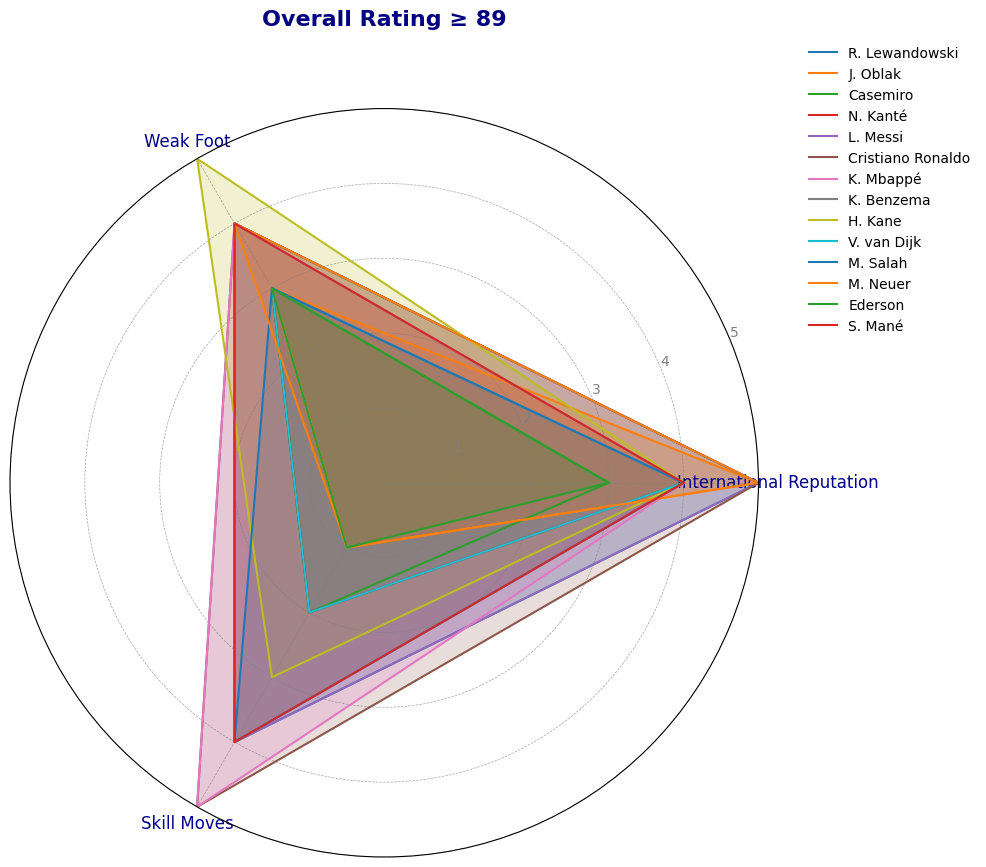

In [443]:
# Filter players with Overall >= 89
players_above_89 = X_train[y_train >= 89]

# Define attributes for radar chart
attributes = ['International Reputation', 'Weak Foot', 'Skill Moves']
data = players_above_89[['Name'] + attributes].set_index('Name')

# Number of variables and angles for radar chart
angles = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False).tolist()
angles += angles[:1]

# Initialize the radar chart
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Plot each player's data
for player, row in data.iterrows():
    values = row.tolist() + row.tolist()[:1]
    ax.plot(angles, values, linewidth=1.5, linestyle='solid', label=player)
    ax.fill(angles, values, alpha=0.2)

# Chart appearance
ax.set_yticks(range(1, 6))
ax.set_yticklabels(['1', '2', '3', '4', '5'], fontsize=10, color='grey')
ax.set_ylim(0, 5)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes, fontsize=12, color='darkblue')

# Adjust title and legend
plt.title('Overall Rating ≥ 89', size=16, color='navy', y=1.1, weight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10, frameon=False)
ax.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

### `Height` and `Weight`

In [446]:
# Heaviest players
heaviest_player = X_train.sort_values(['Weight'], ascending=False).head(10)[['Name', 'Weight']]
print(heaviest_player)

                  Name  Weight
8979   22 A. Akinfenwa     110
16669        D. Corozo     104
17137   21 D. Turnbull     103
16207          T. Holý     102
16170    21 B. Edwards     102
997     Z. Ibrahimović     102
7642        22 K. Mina     102
6154          T. Chorý     101
1437        H. Maguire     100
8353           D. Dike     100


In [448]:
# Tallest players
tallest_player = X_train.sort_values(['Height'], ascending=False).head(10)[['Name', 'Height']]
print(tallest_player)

               Name  Height
16207       T. Holý     206
12975     K. Hudlin     206
15554     M. Nocita     203
17509      C. Tyler     203
14629     P. Ndiaye     203
15941    A. Noppert     203
12796     S. Alvero     202
16246      D. Thiam     202
16394      N. Aslan     202
16927  20 M. Edapin     202


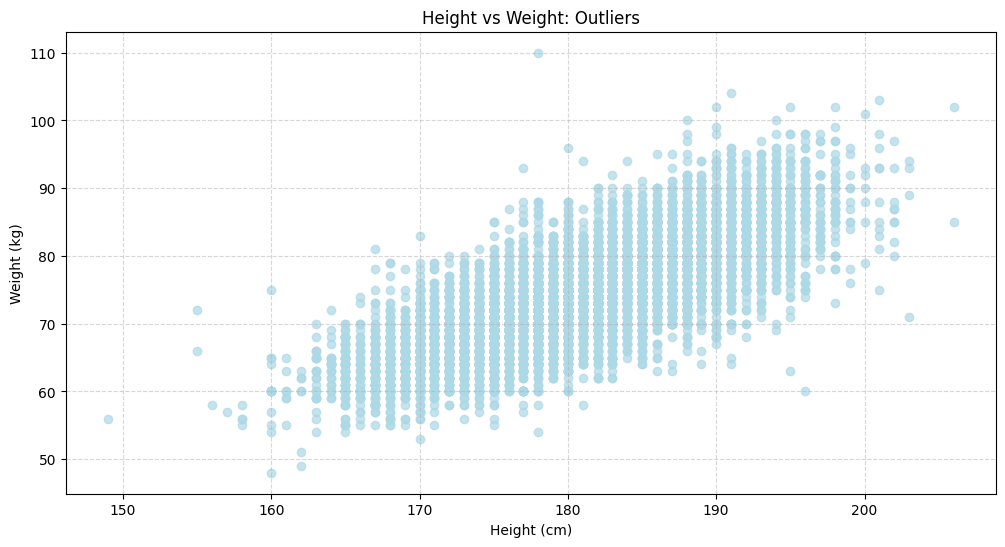

In [450]:
# Scatter plot for Height vs Weight
plt.figure(figsize=(12, 6))
plt.scatter(X_train['Height'], X_train['Weight'], alpha=0.7, color='lightblue')
plt.title('Height vs Weight: Outliers', fontsize=12)
plt.xlabel('Height (cm)', fontsize=10)
plt.ylabel('Weight (kg)', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()

### `Nationality`

In [453]:
X_train['Nationality'].unique()

array(['Norway', 'England', 'France', 'Ecuador', 'Korea Republic',
       'Spain', 'Sweden', 'Germany', 'Bolivia', 'Netherlands', 'Uruguay',
       'Mexico', 'Cape Verde Islands', 'Turkey', 'India',
       'North Macedonia', 'Italy', 'Switzerland', 'Greece', 'Belgium',
       'Slovakia', 'United States', 'Belarus', 'Republic of Ireland',
       'Paraguay', 'Argentina', 'Brazil', 'Saudi Arabia', 'Russia',
       'Scotland', 'Venezuela', 'Wales', 'Peru', 'Hungary', 'Portugal',
       'Australia', 'Poland', 'Canada', 'Kosovo', 'Japan', 'China PR',
       'Nigeria', 'Cameroon', 'Sierra Leone', 'Denmark', 'Algeria',
       'Senegal', "Côte d'Ivoire", 'Romania', 'Armenia', 'Slovenia',
       'Morocco', 'Luxembourg', 'Austria', 'Bosnia and Herzegovina',
       'Mali', 'Bulgaria', 'Latvia', 'Colombia', 'Haiti', 'Liechtenstein',
       'Albania', 'Madagascar', 'Gabon', 'Croatia', 'Czech Republic',
       'Guinea Bissau', 'Finland', 'Serbia', 'New Zealand',
       'South Africa', 'Northern Irela

In [455]:
X_train['Nationality'].value_counts().head(20)

Nationality
England                1217
Germany                 842
Spain                   787
France                  675
Argentina               671
Brazil                  431
Italy                   422
Netherlands             379
Uruguay                 330
Japan                   302
Ecuador                 288
United States           281
Venezuela               276
Portugal                269
China PR                265
Poland                  262
Sweden                  260
Turkey                  255
Republic of Ireland     246
Norway                  239
Name: count, dtype: int64

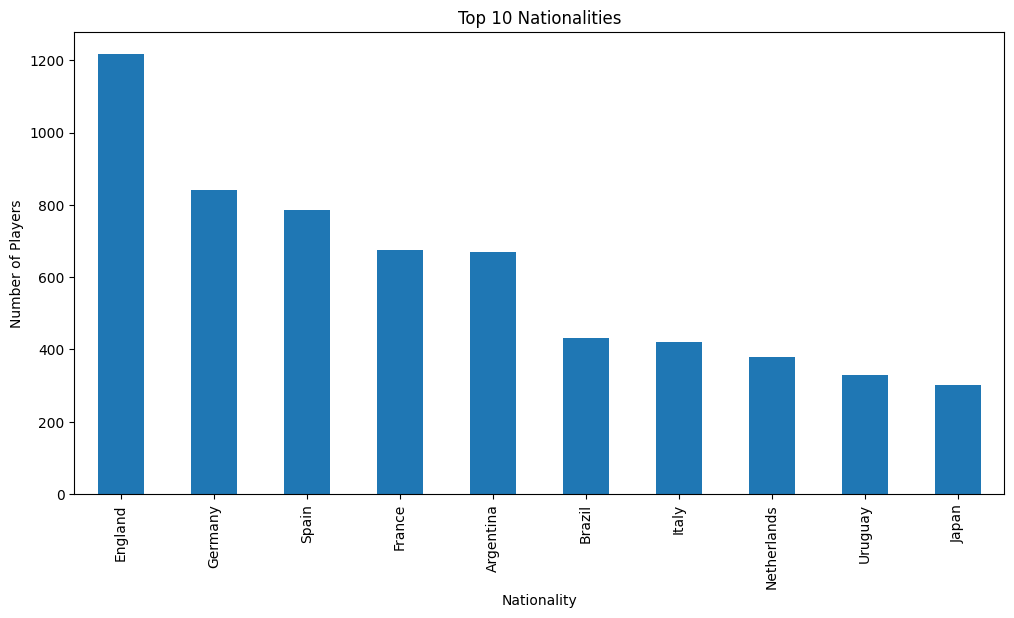

In [457]:
X_train['Nationality'].value_counts().head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Nationalities')
plt.ylabel('Number of Players')
plt.show()

England is the country that contributes the highest number of players.

### Top 5 Players by Overall Rating from Leading Football Nations

In [461]:
X_train_with_overall = X_train.copy()
X_train_with_overall['Overall'] = y_train

# Top 5 players from each country in the top 5 list
top_countries = ['England', 'Germany', 'Spain', 'France', 'Argentina']

# Create a dictionary to store results
top_players_by_country = {}

for country in top_countries:
    # Filter players by country
    country_data = X_train_with_overall.loc[X_train_with_overall['Nationality'] == country]
    
    # Sort by Overall and select the top 5
    top_players_by_country[country] = country_data.sort_values(['Overall'], ascending=False).head(5)

# Display the results for each country
for country, players in top_players_by_country.items():
    print(f"\nTop 5 Players from {country}:")
    print(players[['Name', 'Overall', 'Potential', 'Club', 'Position']])


Top 5 Players from England:
                    Name  Overall  Potential               Club Position
52               H. Kane       89         89  Tottenham Hotspur       ST
21   T. Alexander-Arnold       87         90          Liverpool       RB
242          R. Sterling       86         86            Chelsea       ST
45             K. Walker       85         85    Manchester City       RB
189             J. Vardy       85         85     Leicester City       ST

Top 5 Players from Germany:
                Name  Overall  Potential               Club Position
9151        M. Neuer       90         90  FC Bayern München       GK
126       17 P. Lahm       88         88  FC Bayern München       RB
11774  M. ter Stegen       88         89       FC Barcelona       GK
125         T. Kroos       88         88     Real Madrid CF      LCM
694       A. Rüdiger       87         88     Real Madrid CF      RCB

Top 5 Players from Spain:
                 Name  Overall  Potential             Club Posi

### `Age`

In [464]:
X_train['Age'].unique()

array([22, 16, 35, 26, 23, 18, 21, 24, 20, 19, 25, 28, 27, 30, 32, 17, 33,
       29, 31, 34, 36, 38, 37, 41, 39, 43, 44, 40, 15, 54, 42])

In [466]:
X_train['Age'].value_counts().head(20)

Age
20    1563
19    1531
21    1474
22    1327
18    1171
23    1012
24     867
25     748
26     637
27     573
17     547
28     478
29     412
30     386
31     317
32     251
33     191
34     156
16     129
35     124
Name: count, dtype: int64

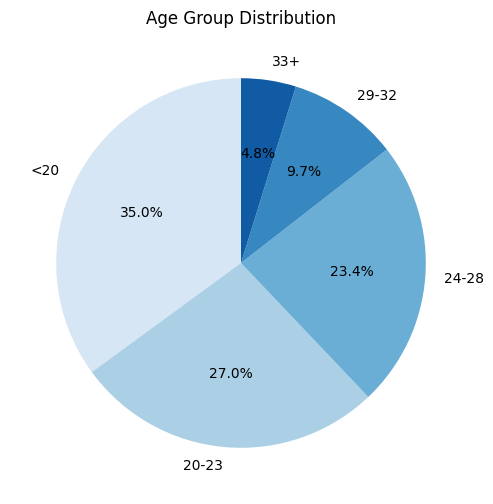

In [468]:
# Age bins and labels
age_bins = [0, 20, 23, 28, 32, 100]
labels = ['<20', '20-23', '24-28', '29-32', '33+']

# Counting occurrences of each group
age_group = pd.cut(X_train['Age'], bins=age_bins, labels=labels).value_counts()

# Pie chart
plt.figure(figsize=(12, 6))
plt.pie(age_group, labels=age_group.index, autopct='%1.1f%%', 
        colors=sns.color_palette("Blues", len(labels)), startangle=90)

plt.title('Age Group Distribution')
plt.show()

The dataset predominantly consists of young players.

##### Let’s check how **`Age`** affects player ratings:

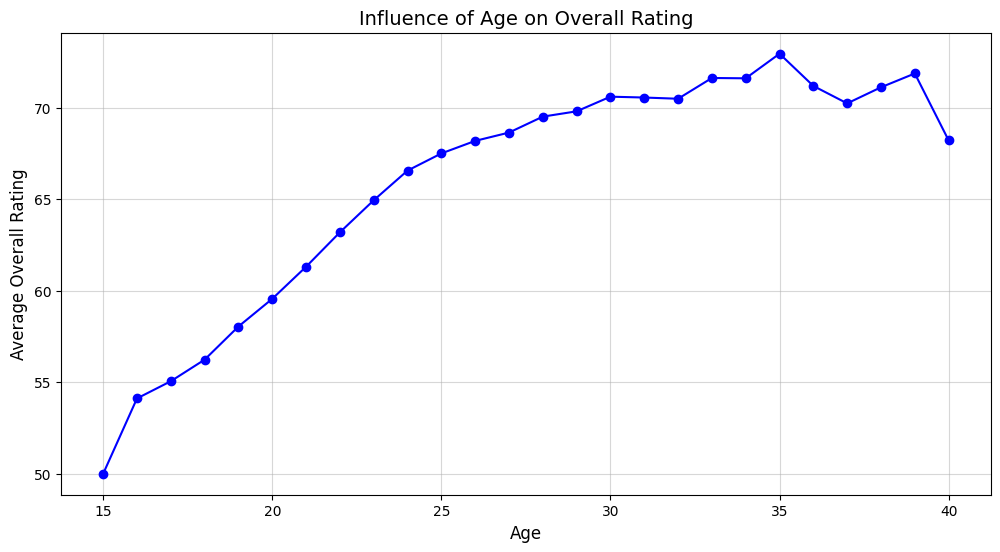

In [472]:
data_train = X_train.copy()
data_train['Overall'] = y_train  

# Filter for players under 41 years old
filtered_dataset = data_train[data_train['Age'] < 41]

# Group by Age and calculate the mean Overall Rating
age_rating = filtered_dataset.groupby('Age')['Overall'].mean().reset_index()

# Plot the relationship between Age and Overall Rating
plt.figure(figsize=(12, 6))
plt.plot(age_rating['Age'], age_rating['Overall'], marker='o', color='blue')
plt.title('Influence of Age on Overall Rating', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Overall Rating', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

Better ratings at later stages in career.

### `Body Type`

In [476]:
X_train['Body Type'].unique()

['Lean', 'Normal', 'Stocky', 'Unique']
Categories (4, object): ['Lean', 'Normal', 'Stocky', 'Unique']

In [478]:
X_train['Body Type'].value_counts()

Body Type
Normal    8302
Lean      5075
Stocky     620
Unique     103
Name: count, dtype: int64

In [480]:
# Filter players with Body Type 'Unique'
unique_body = X_train[X_train['Body Type'] == 'Unique'][['Name', 'Height', 'Weight']]

print(unique_body.head(25))

                   Name  Height  Weight
41       R. Lewandowski     185      81
34          Alex Telles     181      71
399         C. Immobile     185      85
0           L. Goretzka     189      82
748           A. Witsel     186      81
764          C. Eriksen     181      76
12893          J. Oblak     188      87
110         A. Florenzi     173      67
95          L. Martínez     174      72
330       Gabriel Jesus     175      73
92      Ricardo Pereira     175      70
303             L. Sané     183      80
180          E. Haaland     195      94
210          João Félix     181      70
2641       S. Kalajdžić     200      93
17           F. de Jong     180      74
1295   D. Calvert-Lewin     187      71
672          L. Insigne     163      59
711             W. Zaha     180      66
4006        22 Sokratis     186      82
6815       19 P. Crouch     201      75
1048         A. Laporte     191      85
880          M. de Ligt     189      89
45            K. Walker     183      83


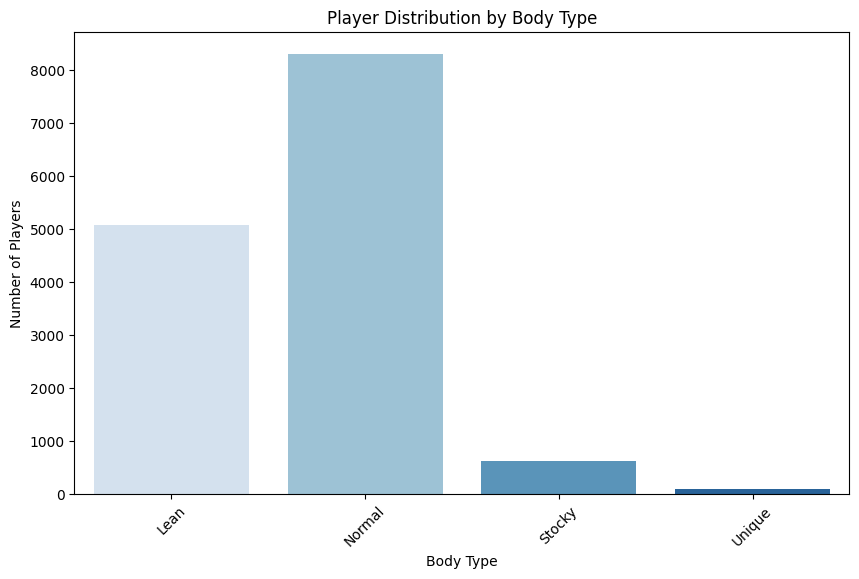

In [482]:
# Plot distribution of players by body type
plt.figure(figsize=(10, 6))
sns.barplot(x=X_train['Body Type'].value_counts().index, y=X_train['Body Type'].value_counts().values, palette='Blues')

plt.title('Player Distribution by Body Type', fontsize=12)
plt.xlabel('Body Type')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

The majority of players have a **Normal** or **Lean** body type. Players classified as having a **Unique** body type don’t fit neatly into the standard categories, making them distinct in their physical attributes.

### `Position`

In [486]:
X_train['Position'].unique().tolist()

['RW',
 'RES',
 'SUB',
 'LDM',
 'RB',
 'LCB',
 'RWB',
 'LCM',
 'RM',
 'CAM',
 'GK',
 'RCB',
 'LS',
 'ST',
 'LM',
 'LB',
 'RS',
 'RDM',
 'CB',
 'LW',
 'RCM',
 'CDM',
 'LWB',
 'LAM',
 'RAM',
 'LF',
 'CM',
 'RF',
 'CF']

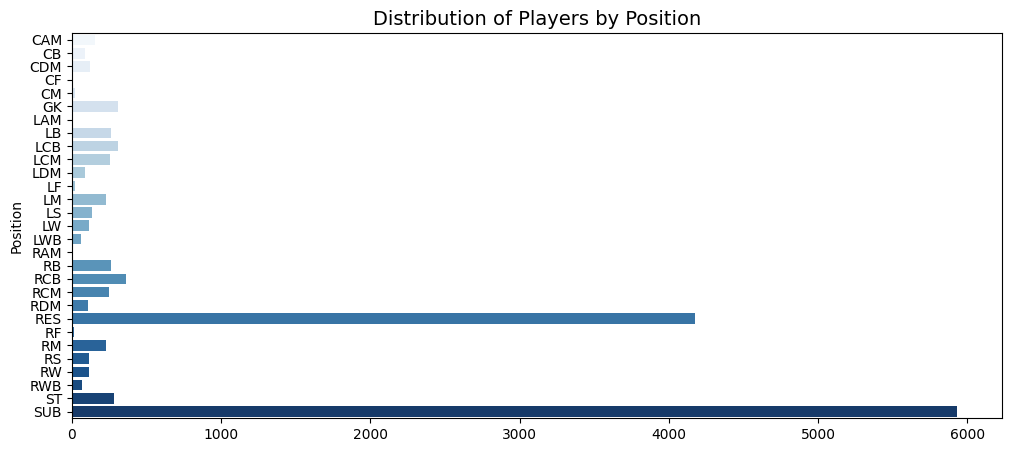

In [488]:
# count positions
count_position = X_train['Position'].value_counts()

# Plot the positions
plt.figure(figsize=(12, 5))
sns.barplot(y=count_position.index, x=count_position.values, palette="Blues")
plt.title('Distribution of Players by Position', fontsize=14)
plt.show()

Predominantly substitutes and reserves!

##### Let’s check how **`Position`** affects player ratings:

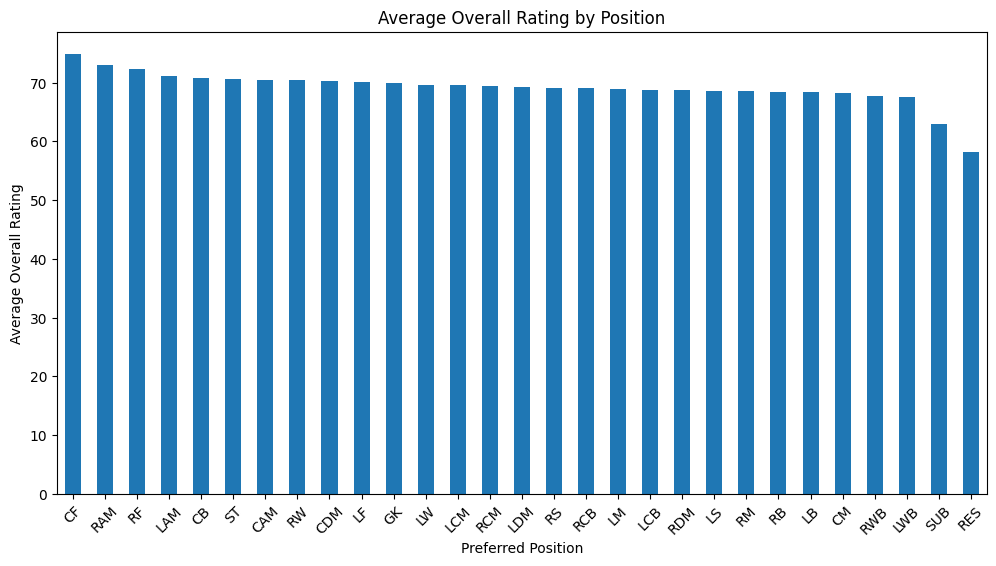

In [492]:
# Visualize the relationship between Average Ranking and Position
X_train.assign(Overall=y_train).groupby('Position')['Overall'].mean().sort_values(ascending=False).plot(
    kind='bar', figsize=(12, 6), title='Average Overall Rating by Position'
)
plt.xlabel('Preferred Position')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)
plt.show()

The bar plot reveals that **Center Forwards (CF)** and **Right Attacking Midfielders (RAM)** tend to have higher average ratings compared to other positions. As expected, substitutes and reserves rank lower on average. 

Interestingly, as we move from attacking positions to defensive roles, there’s a slight but consistent decrease in average ratings—except for **goalkeepers (GK)**, who surprisingly rank quite high.

#### Let's see in more detail:

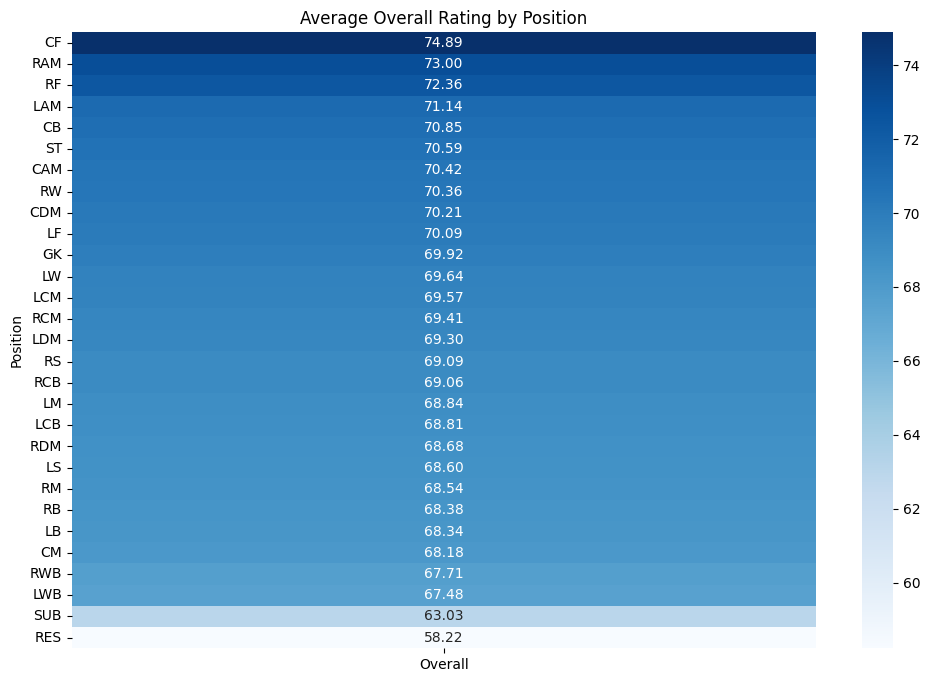

In [496]:
# Matrix
position_matrix = X_train.assign(Overall=y_train).pivot_table(index='Position', values='Overall', aggfunc='mean').sort_values(by='Overall', ascending=False)

# Plot the matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(position_matrix, annot=True, cmap='Blues', cbar=True, fmt='.2f')
plt.title('Average Overall Rating by Position', fontsize=12)
plt.ylabel('Position')
plt.show()

### `Preferred Foot`

In [498]:
X_train['Preferred Foot'].value_counts()

Preferred Foot
1    10862
0     3238
Name: count, dtype: int64

In [499]:
# Calculate percentages for each foot preference
foot_percentages = X_train['Preferred Foot'].value_counts(normalize=True) * 100

# And create a DataFrame
foot = pd.DataFrame({'Percentage': [foot_percentages.get(1, 0), foot_percentages.get(0, 0)]}, index=['Right Foot', 'Left Foot'])
foot.style.background_gradient(cmap='Blues')

,Percentage
Right Foot,77.035461
Left Foot,22.964539


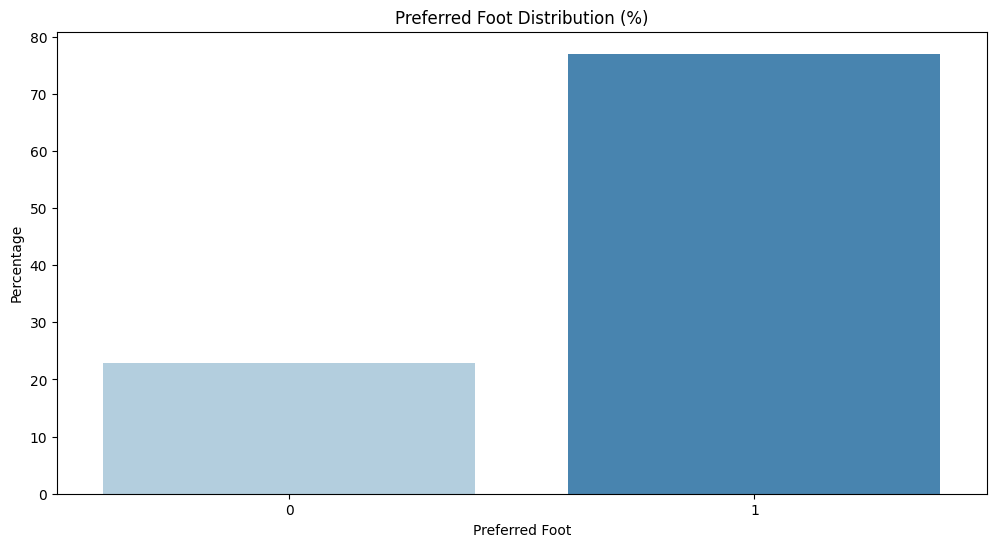

In [503]:
# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=foot_percentages.index, y=foot_percentages.values, palette='Blues')
plt.title('Preferred Foot Distribution (%)')
plt.ylabel('Percentage')
plt.show()

As expected, there are significantly more right-footed players than left-footed ones.

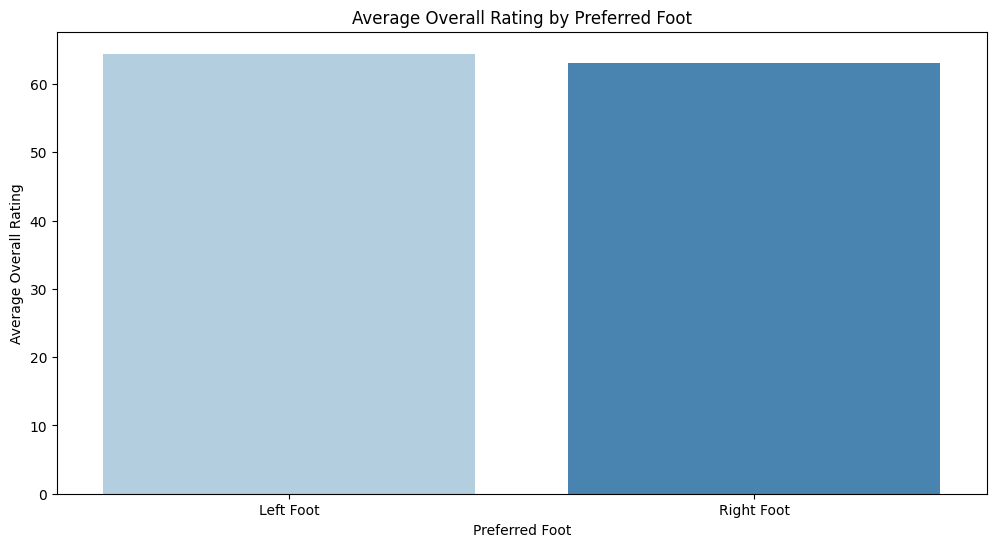

In [506]:
# Calculate the average Overall rating for each Preferred Foot
foot_avg = X_train.assign(Overall=y_train).groupby('Preferred Foot')['Overall'].mean()

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=foot_avg.index, y=foot_avg.values, palette='Blues')
plt.title("Average Overall Rating by Preferred Foot", fontsize=12)
plt.xticks([0, 1], ['Left Foot', 'Right Foot'])
plt.ylabel("Average Overall Rating")
plt.show()

The plot reveals a **very small advantage** for left-footed players in terms of average overall ratings. However, the difference is so small that it is almost unnoticeable. This suggests that **Preferred Foot** might not be a very significant feature in predicting player ratings.

## Pairwise variables analysis

### `Nationality` vs `Wage`

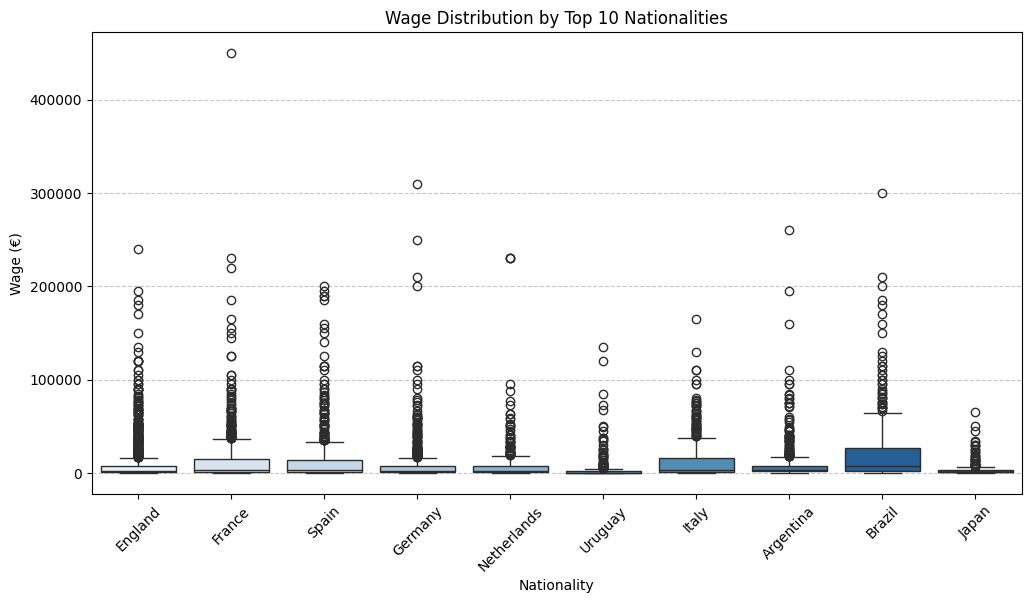

In [511]:
# Filter top 10 nationalities and plot wage distribution
top_nationalities = X_train['Nationality'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train[X_train['Nationality'].isin(top_nationalities)],
            x='Nationality', y='Wage', palette='Blues')

plt.title('Wage Distribution by Top 10 Nationalities')
plt.xticks(rotation=45)
plt.xlabel('Nationality')
plt.ylabel('Wage (€)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The plot shows how wages vary across the top 10 nationalities in football. Players from Brazil, England, and Spain generally have the highest wages, likely reflecting their strong football cultures and talent pools. Nationalities like Japan and Uruguay show lower median wages, suggesting fewer players earning at the top end. The presence of outliers (dots) indicates a few star players earning significantly more than others in their nationality group.

### `Nacionality` vs `Position`

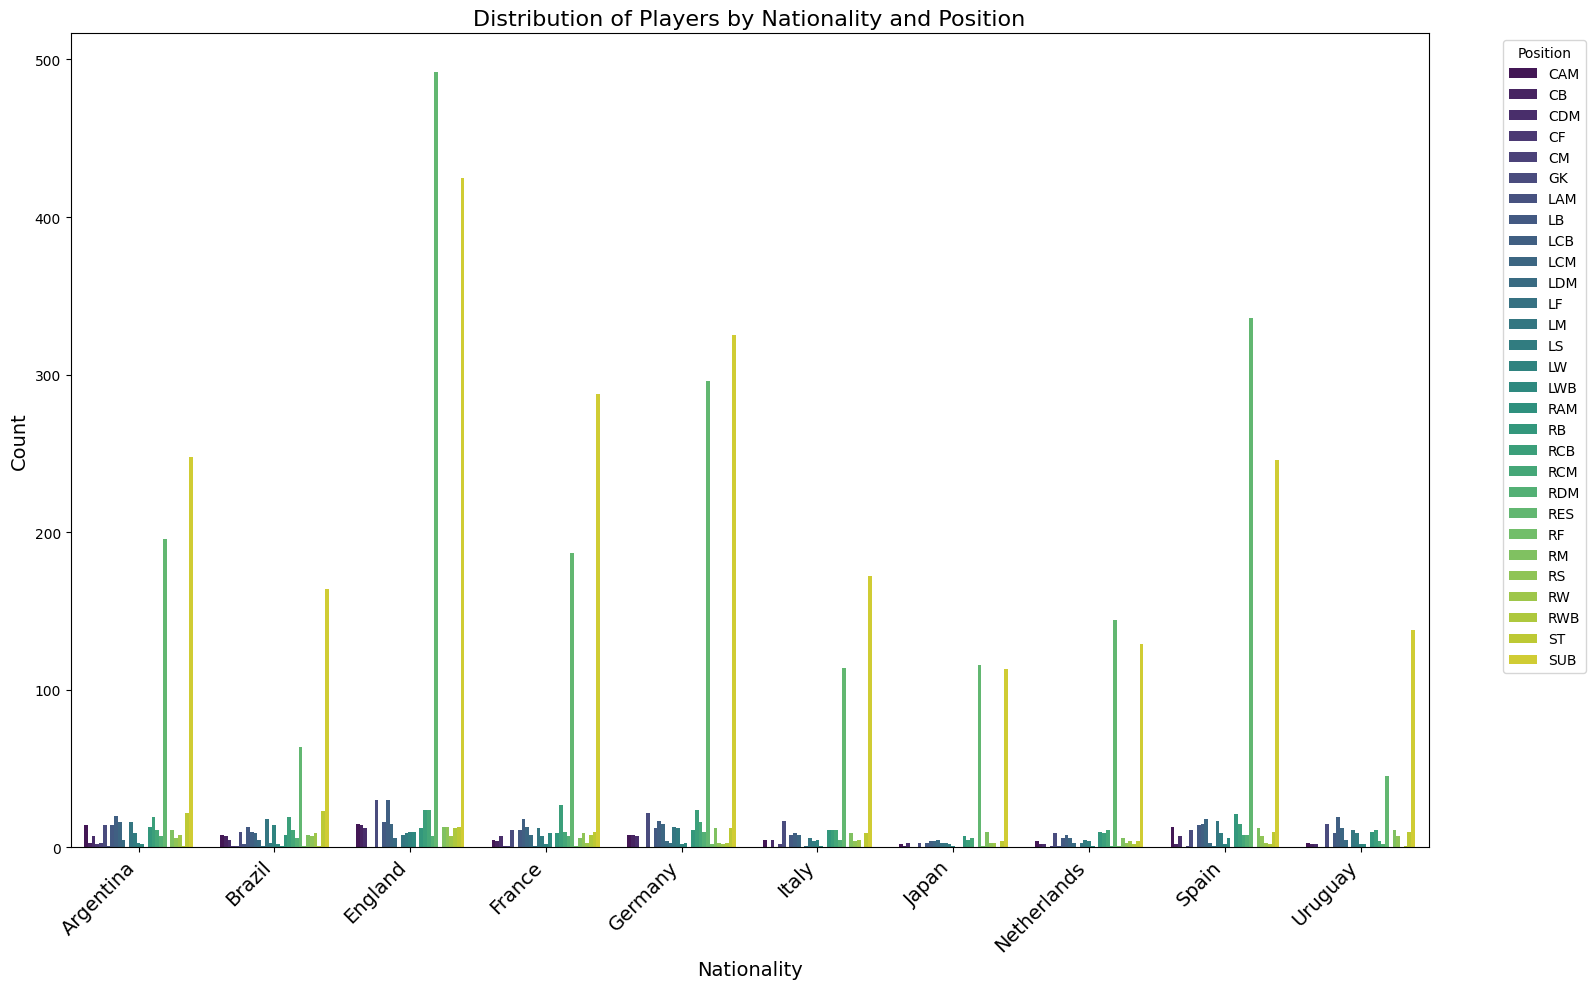

In [515]:
top_nation = X_train[X_train['Nationality'].isin(top_nationalities)]

# Number of instances
pos_nation_counts = top_nation.groupby(['Nationality', 'Position']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(16, 10))
sns.barplot(data=pos_nation_counts, x='Nationality', y='Count', hue='Position', palette='viridis')

# Add titles and labels
plt.title('Distribution of Players by Nationality and Position', fontsize=16)
plt.xlabel('Nationality', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### `Nacionality` vs `Age`

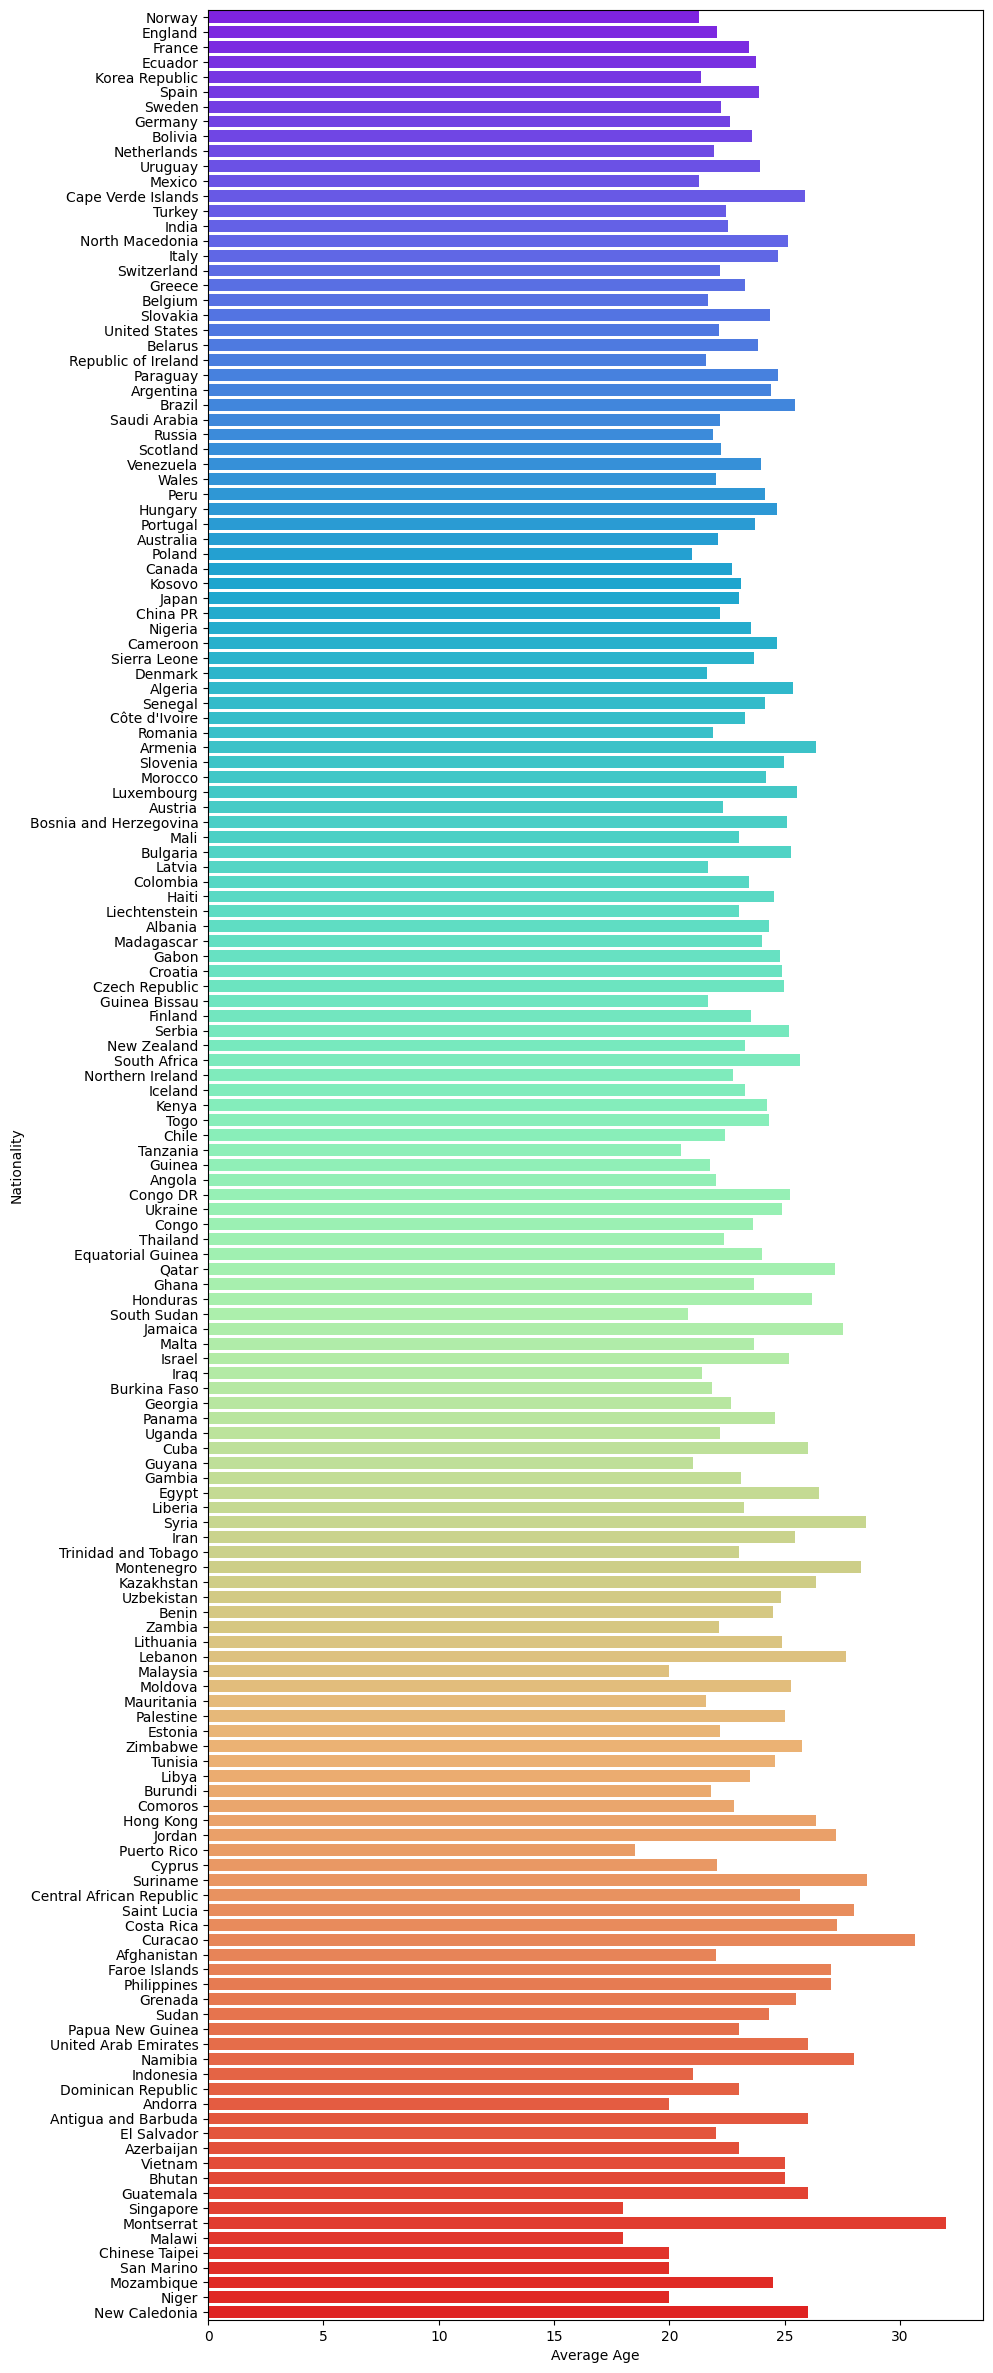

In [517]:
# Create a bar plot for Age by Nationality

plt.figure(figsize=(10, 30))
sns.barplot(y=X_train['Nationality'], x=X_train['Age'], ci=None, palette="rainbow")

plt.xlabel('Average Age', fontsize=10)
plt.ylabel('Nationality', fontsize=10)
plt.show()

Average age of players from Curacao and Monserratis is greater than 31, while that of Singapore and Malawi is less than 20!!!!!

### `Wage` vs `Age`

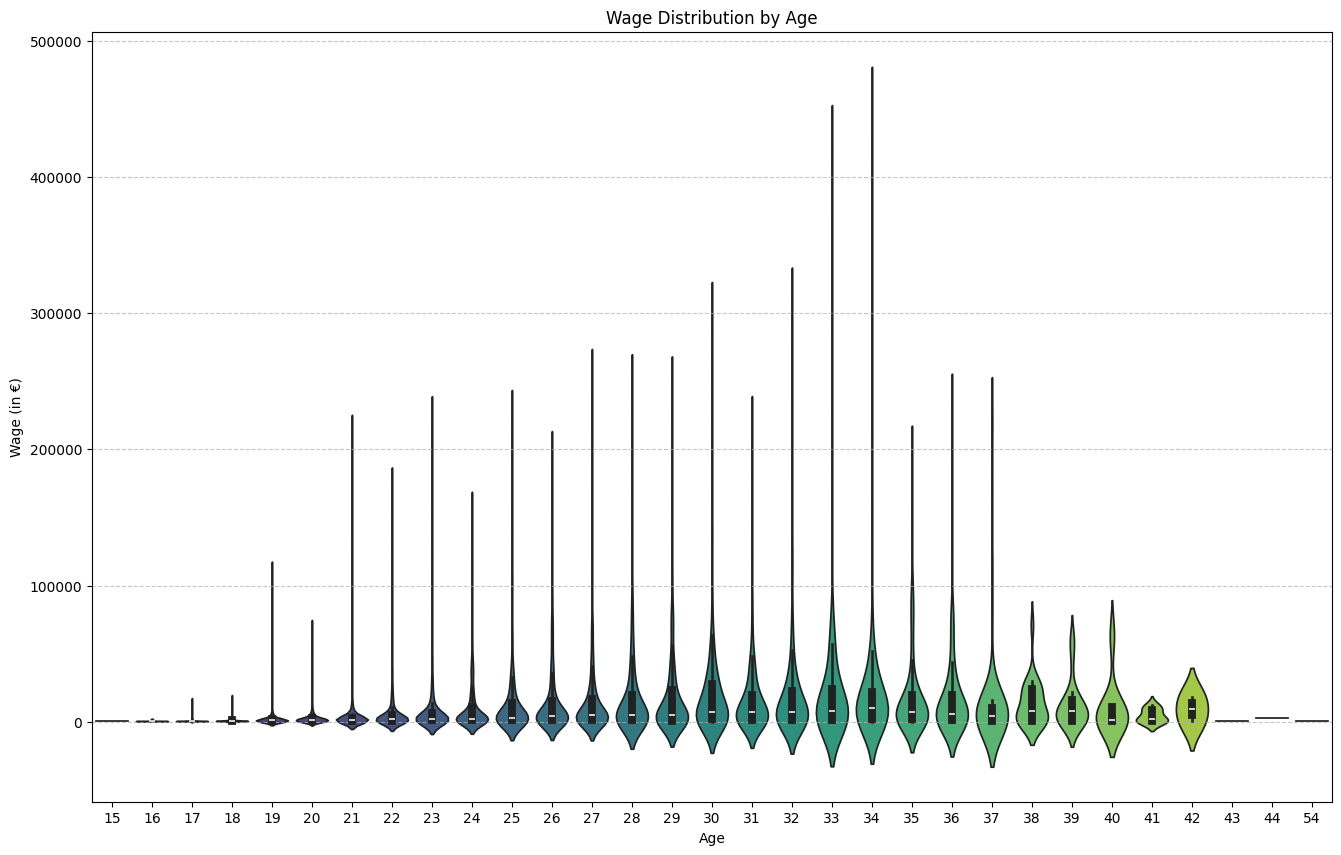

In [520]:
plt.figure(figsize=(16, 10))

sns.violinplot(data=X_train, x='Age', y='Wage', palette='viridis')
plt.title('Wage Distribution by Age', fontsize=12)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Wage (in €)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This violin plot shows that wages peak between ages 29 and 33, where players are most likely to earn very high amounts, with some exceeding €300,000. After 33, wages generally decrease, with fewer players earning exceptionally high salaries. While a few older players still earn over €100,000, most see their wages drop as they near the end of their careers.

### `Position` vs `Preferred Foot`

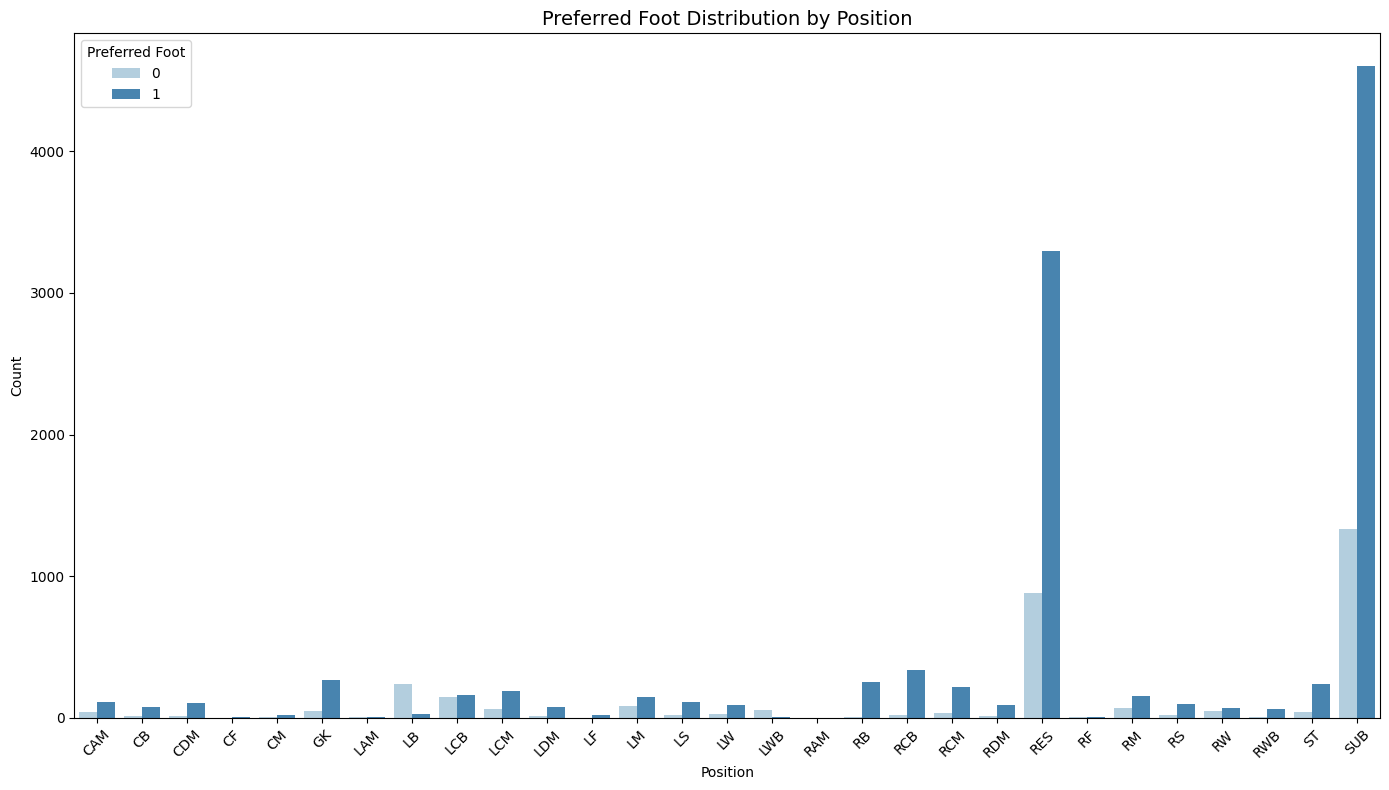

In [524]:
# Grouping by Position and Preferred Foot
pos_foot = X_train.groupby("Position")["Preferred Foot"].value_counts().reset_index(name='Count')

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Position', y='Count', data=pos_foot, hue='Preferred Foot', palette='Blues')

plt.title('Preferred Foot Distribution by Position', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Surprisingly, left-back is the only position where left-footed players outnumber right-footed players—and by a significant margin. Interestingly, right-footed players dominate other left-sided positions.

### Histogram plots

In [527]:
# Columns to plot
to_plot = ['Height', 'Weight', 'Age', 'Potential', 
    'Value', 'Wage', 'Release Clause']

fig, axes = plt.subplots(ncols=3, nrows=int(np.ceil(len(columns_to_plot) / 3)), figsize=(20, 20))

# Loop through the columns
for col, ax in zip(to_plot, axes.flat):
    sns.histplot(X_train[col], ax=ax, kde=True).set(title=f"PDF of: {col}", xlabel="")

# Remove any extra empty subplots
for ax in axes.flat[len(to_plot):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

NameError: name 'columns_to_plot' is not defined

### Boxplots

In [ ]:
# Columns to plot
to_plot = ['Height', 'Weight', 'Age', 'Potential', 'Value', 'Wage', 'Release Clause']

fig, axes = plt.subplots(ncols=3, nrows=int(np.ceil(len(to_plot) / 3)), figsize=(20, 20))

# Loop through the columns
for col, ax in zip(to_plot, axes.flat):
    sns.boxplot(data=X_train, y=col, ax=ax)
    ax.set_title(f"Boxplot of: {col}")

# Remove any extra empty subplots
for ax in axes.flat[len(to_plot):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

1. **Height and Weight**:  
   Most players are between 170-190 cm tall and weigh 60-90 kg. These are typical ranges for footballers.

2. **Age**:  
   Football is a young person’s game! Most players are in their early 20s, with fewer older players in the mix.

3. **Potential**:  
   The majority of players have a "good but not great" potential (70-80), with only a few standing out as exceptional.

4. **Value, Wage, and Release Clause**:  
   These are all highly skewed. Most players earn modestly and have low values, while a few stars are off the charts in terms of value, salary, and release clauses.

In [ ]:
# Columns to plot
to_plot = ['Height', 'Weight', 'Age', 'Potential', 'Value', 'Wage', 'Release Clause']

fig, axes = plt.subplots(ncols=3, nrows=int(np.ceil(len(to_plot) / 3)), figsize=(20, 20))

# Loop through the columns
for col, ax in zip(to_plot, axes.flat):
    sns.regplot(x=X_train[col], y=y_train, ax=ax, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    ax.set_title(f"Relationship of {col} with Target")

# Remove any extra empty subplots
for ax in axes.flat[len(to_plot):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

1. **Height**:  
   Taller players don’t always have higher ratings—height doesn’t seem to matter much for overall quality.

2. **Weight**:  
   Heavier players show a slight edge, but weight isn’t a strong factor in determining ratings.

3. **Age**:  
   Older players tend to have better ratings, but some younger stars break the trend.

4. **Potential**:  
   The higher the potential, the higher the rating—this is a clear and strong relationship.

5. **Value**:  
   High-value players often have high ratings, but there’s a lot of variability at lower values.

6. **Wage**:  
   Big earners tend to have high ratings, but there are some overpaid players who don’t match up!

7. **Release Clause**:  
   Players with expensive release clauses usually have better ratings, but there are exceptions.

## Statistical Analysis

### Basic Statistics

In [ ]:
X_train.describe()

## Chi-square Test

In [ ]:
# List categorical variables
categorical_columns = X_train.select_dtypes(include=['category','object']).columns

# Chi-Square test
for column in categorical_columns:
    crosstab = pd.crosstab(X_train[column], y_train)
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"Chi-Square Test for {column}: p-value = {p}")

1. **Name**:  
🚫 No relationship with the overall rating (p = 0.617). Names are just identifiers!

2. **Nationality**, **Club**, **Work Rate**, **Body Type**, **Position**:  
✅ Strong relationship (p ≈ 0.0). These factors significantly impact a player’s rating, reflecting skills, physical traits, and playing environment.

3. **Loaned From**:  
🚫 No relationship (p = 1.0). Loan status doesn’t impact ratings.

## Pearson Correlation

In [ ]:
# List of numerical variables
numerical_columns = X_train.select_dtypes(include=['int', 'float']).columns

# Pearson correlation
for column in numerical_columns:
    correlation, p_value = pearsonr(X_train[column], y_train)
    print(f"Pearson Correlation between {column} and y_train: {correlation:.4f}, p-value: {p_value:.4g}")

### Correlation plot

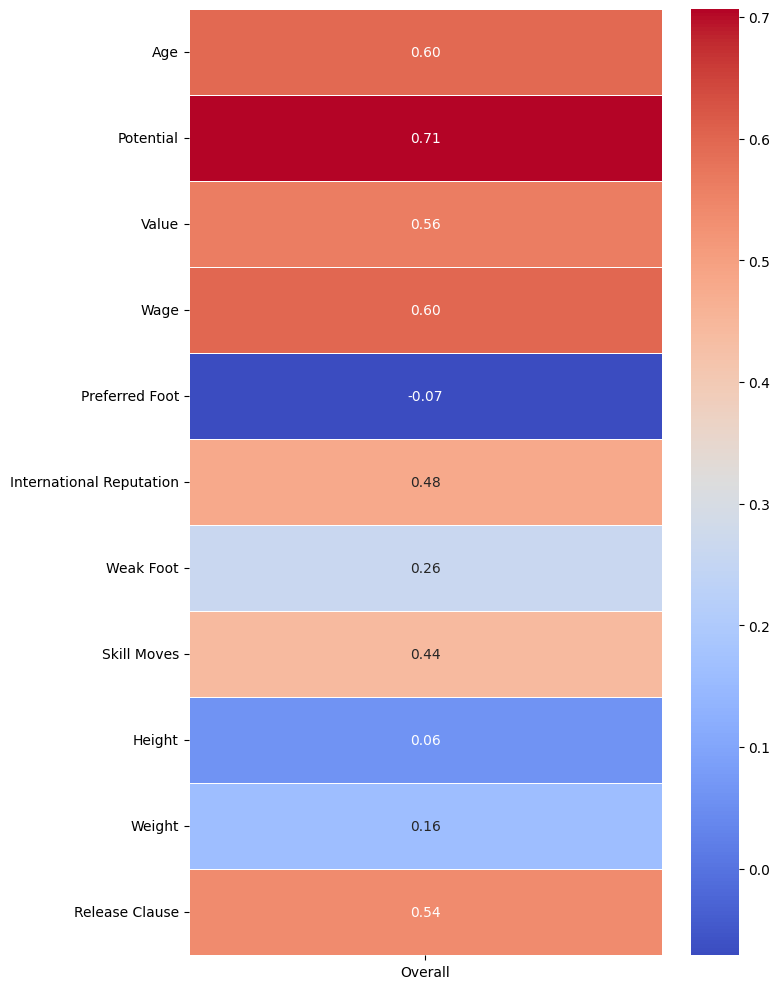

In [531]:
X_train_target = X_train.copy()
X_train_target['Overall'] = y_train

# List of numerical variables (including the target)
numerical_features = X_train_target.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
correlation_matrix = numerical_features.corr()

# Correlations of numerical features with the 'Overall' target
correlation_with_target = correlation_matrix[['Overall']].drop('Overall')

# Plot the heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', linewidths=0.5)
plt.tight_layout()
plt.show()

- **Most Predictive Features**:  
  `Potential`, `Wage`, `Value`, and `Age` are strongly linked to `Overall Rating`—these are your top features for predictive modeling!

- **Least Predictive Features**:  
  `Height` and `Preferred Foot` barely affect ratings, so their contribution is minimal.

## Final Decision

We’ll focus on the top features for modeling:  
- **Categorical**: `Club`, `Position`, `Work Rate`, `Body Type`, and `Nationality` all have strong links to `Overall`.  
- **Numerical**: `Potential`, `Wage`, `Value`, and `Age` are the strongest predictors.  

On the other hand, **Preferred Foot** adds little value and will be removed. **Height** and **Weight** also have weak correlations and will be deprioritized, but kept for now.  

For **Loan Status**, although it has no relationship with `Overall` (`p = 1.0`), we’ll try converting it to a binary variable (0 for "Loaned" and 1 for "Permanent" or vice-versa) to see if it adds some value.

In [536]:
X_train= X_train.drop(columns=['Preferred Foot'])
X_test= X_test.drop(columns=['Preferred Foot'])

##### Lets give it another look:

In [539]:
X_train.head()

,Name,Age,Nationality,Potential,Club,Value,Wage,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Loaned From,Height,Weight,Release Clause
6023,H. Stenevik,22,Norway,74,Strømsgodset IF,1100000.0,1000.0,1.0,3.0,4.0,Medium/ High,Lean,RW,Permanent,185,70,1600000.0
17163,22 T. Wooster,16,England,73,Manchester United,230000.0,500.0,1.0,3.0,1.0,Medium/ Medium,Lean,RES,Permanent,195,85,656000.0
1750,14 J. Rothen,35,France,71,Stade Malherbe Caen,325000.0,15000.0,2.0,2.0,3.0,Medium/ Medium,Normal,SUB,Permanent,177,74,0.0
2661,22 D. Noboa,26,Ecuador,70,Guayaquil City FC,1100000.0,500.0,1.0,3.0,2.0,Medium/ High,Normal,LDM,Permanent,183,79,2400000.0
13361,22 Baek Seung Woo,22,Korea Republic,62,Jeju United FC,180000.0,1000.0,1.0,3.0,2.0,Medium/ Medium,Normal,SUB,Permanent,170,65,261000.0


In [541]:
X_test.head()

,Name,Age,Nationality,Potential,Club,Value,Wage,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Loaned From,Height,Weight,Release Clause
13408,22 R. Alba,18,Mexico,70,Club Atlético de San Luis,375000.0,1000.0,1.0,3.0,2.0,Medium/ Medium,Normal,RES,Permanent,182,70,872000.0
14255,Lee Ho Jae,21,Korea Republic,61,Pohang Steelers,210000.0,1000.0,1.0,3.0,2.0,High/ Low,Stocky,SUB,Permanent,192,84,305000.0
101,F. Mendy,27,France,84,Real Madrid CF,38000000.0,170000.0,1.0,5.0,4.0,High/ High,Unique,LB,Permanent,180,73,80800000.0
12577,22 J. Eichhorn,19,Germany,73,Hannover 96,500000.0,2000.0,1.0,3.0,2.0,Medium/ Medium,Lean,SUB,Permanent,165,66,1100000.0
313,Luis Milla,27,Spain,81,Getafe CF,19000000.0,30000.0,1.0,3.0,3.0,High/ High,Lean,SUB,Permanent,175,67,41300000.0


In [543]:
print(X_train.shape, X_test.shape)

(14100, 17) (3525, 17)


In [545]:
print(y_train.shape, y_test.shape)

(14100,) (3525,)


# Export

In [548]:
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("Datasets successfully exported as CSV files.")

Datasets successfully exported as CSV files.
